Table of Contents

    Introduction
        Overview of the Project
        Dataset Description
        Goals and Objectives

    Setup: Data Exploration and Cleaning
        Handling Missing Values
        Outlier Removal
        Feature Engineering (One-Hot Encoding for Days and Months)

    Model Development
        Linear Regression
        Multiple Linear Regression
        Deep Neural Network (DNN)

    Using the Outcomes: Model Evaluation
        Comparison of Actual vs. Predicted Values
        Discussion of Model Performance

    Conclusion


**Overview of the Project**

This project investigates the impact of weather conditions on traffic accidents in Manhattan, New York. By analyzing traffic collision data combined with weather information, the study aims to predict collision risks, providing insights for improving insurance pricing strategies.

**Dataset Description**

The dataset includes detailed records of traffic collisions in New York City, enriched with weather data to assess its influence on accident frequency. This serves as a foundation for predictive modeling.

**Goals and Objectives**

-Predicting Collision Risks: Develop and compare machine learning models to accurately forecast the likelihood of traffic accidents based on weather conditions and other relevant factors.

-Feature Engineering and Data Insights: Apply advanced feature engineering techniques to reveal the true effects within the dataset. This involves identifying the optimal balance between cleaning the data and preserving critical information, thereby ensuring the dataset remains valuable for accurate predictions.

-Improving Model Quality: Explore ways to enhance model performance by incorporating additional variables or experimenting with different algorithms. The focus is on determining how these adjustments can lead to more accurate and reliable predictions.

-Evaluating Model Performance: Test the developed models on independent test data to assess their predictive accuracy. This includes analyzing how well each model generalizes to new data and identifying areas for further improvement.

# Setup

In [10]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# suppress a warning
pd.options.mode.chained_assignment = None

# Import dataset


In [17]:
df = pd.read_csv('data/big_city_collisions_and_weather.csv')
df_sampled = df.sample(n=100, random_state=42)

In [325]:
#Getting more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   day             2191 non-null   int64         
 1   year            2191 non-null   int64         
 2   mo              2191 non-null   int64         
 3   da              2191 non-null   int64         
 4   collision_date  2191 non-null   datetime64[ns]
 5   temp            2191 non-null   float64       
 6   dewp            2191 non-null   float64       
 7   slp             2191 non-null   float64       
 8   visib           2191 non-null   float64       
 9   wdsp            2191 non-null   float64       
 10  mxpsd           2191 non-null   float64       
 11  gust            2191 non-null   float64       
 12  max             2191 non-null   float64       
 13  min             2191 non-null   float64       
 14  prcp            2191 non-null   float64       
 15  sndp

The .info() command provides important insights about the structure and content of the df_raw dataframe. It reveals the data types, non-null values, and memory usage. We are fine here.

In [21]:
#Checking data
df.head()


day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
0    2  2013   1   1     01/01/2013  37.8  23.6  1011.9   10.0   6.1    8.9   
1    3  2013   1   2     02/01/2013  27.1  10.5  1016.8   10.0   5.3    9.9   
2    4  2013   1   3     03/01/2013  28.4  14.1  1020.6   10.0   3.7    8.0   
3    5  2013   1   4     04/01/2013  33.4  18.6  1017.0   10.0   6.5   13.0   
4    6  2013   1   5     05/01/2013  36.1  18.7  1020.6   10.0   6.6   12.0   

   gust   max   min  prcp   sndp  fog  NUM_COLLISIONS  
0  19.0  39.9  33.1   0.0  999.9    0             381  
1  19.0  33.1  21.9   0.0  999.9    0             480  
2  15.0  32.0  24.1   0.0  999.9    0             549  
3  24.1  37.0  30.0   0.0  999.9    0             505  
4  21.0  42.1  32.0   0.0  999.9    0             389

**Review of the data:**

*   **day** – Day of the week given as an integer, with 1 for Monday through to 7 for Sunday.
*   **da, mo, year** and **pickup_date** – These are self-explanatory.
*   **temp** – Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9.
*   **dewp** – Mean dew point for the day in degrees Fahrenheit to tenths. Missing = 9999.9.
*   **slp** – Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9.
*   **visib** – Mean visibility for the day in miles to tenths. Missing = 999.9.
*   **wdsp** – Mean wind speed for the day in knots to tenths. Missing = 999.9.
*   **mxpsd** – Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9.
*   **gust** – Maximum wind gust reported for the day in knots to tenths. Missing = 999.9.
*   **max** – Maximum temperature reported during the day in Fahrenheit to tenths. (The time of the maximum temperature report varies by country and region so this will sometimes not be the maximum for the calendar day.) Missing = 9999.9.
*   **min** – Minimum temperature reported during the day in Fahrenheit to tenths. (The time of the minimum temperature report varies by country and region so this will sometimes not be the minimum for the calendar day.) Missing = 9999.9.
*   **prcp** – Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; this will usually not end with the midnight observation, meaning it may include the latter part of previous day. Additionally, .00 indicates no measurable precipitation (includes a trace). Missing = 99.99. Note: many stations do not report '0' on days with no precipitation therefore '99.99' will often appear on these days. Also, for example, a station may only report a six-hour amount for the period during which rain fell. See the **Flag** field for the source of the data.
*   **sndp** – Snow depth in inches to tenths (last report for the day if reported more than once). Missing = 999.9. Note: most stations do not report '0' on days with no snow on the ground therefore '999.9' will often appear on these days.
*   **fog** – Indicators (1 = yes and 0 = no or not reported) for occurrence during the day.
*   **NUM_COLLISIONS** – A count of the number of colisions recorded on a given day.

In [23]:
df.describe()

day         year           mo           da         temp  \
count  2191.000000  2191.000000  2191.000000  2191.000000  2191.000000   
mean      4.000000  2015.500228     6.523962    15.726609    55.721086   
std       2.000457     1.707859     3.449207     8.800821    17.506851   
min       1.000000  2013.000000     1.000000     1.000000     6.900000   
25%       2.000000  2014.000000     4.000000     8.000000    41.550000   
50%       4.000000  2016.000000     7.000000    16.000000    56.900000   
75%       6.000000  2017.000000    10.000000    23.000000    71.900000   
max       7.000000  2018.000000    12.000000    31.000000    89.100000   

              dewp          slp        visib         wdsp        mxpsd  \
count  2191.000000  2191.000000  2191.000000  2191.000000  2191.000000   
mean     41.120310  1107.412871    23.426654    50.871976    55.427704   
std      19.298085   895.814069   118.917338   209.762963   208.768664   
min     -16.100000   992.100000     1.700000     0.000000     2.900000   
25%      26.400000  1012.700000     8.500000     3.100000     7.000000   
50%      42.600000  1017.000000     9.800000     4.400000     8.900000   
75%      57.500000  1022.000000    10.000000     5.900000    11.100000   
max      74.800000  9999.900000   999.900000   999.900000   999.900000   

              gust          max          min         prcp         sndp  \
count  2191.000000  2191.000000  2191.000000  2191.000000  2191.000000   
mean    384.628617    65.226974    47.875947     0.141031   920.095710   
std     473.640573    18.156330    17.152164     0.353569   270.092092   
min      14.000000    17.600000    -0.900000     0.000000     1.200000   
25%      18.100000    50.000000    35.100000     0.000000   999.900000   
50%      24.100000    66.900000    48.000000     0.000000   999.900000   
75%     999.900000    82.000000    64.000000     0.080000   999.900000   
max     999.900000    98.100000    82.900000     4.530000   999.900000   

               fog  NUM_COLLISIONS  
count  2191.000000     2191.000000  
mean      0.079416      602.121862  
std       0.270448      102.452173  
min       0.000000       10.000000  
25%       0.000000      533.000000  
50%       0.000000      604.000000  
75%       0.000000      670.000000  
max       1.000000     1161.000000

day               0
year              0
mo                0
da                0
collision_date    0
temp              0
dewp              0
slp               0
visib             0
wdsp              0
mxpsd             0
gust              0
max               0
min               0
prcp              0
sndp              0
fog               0
NUM_COLLISIONS    0
dtype: int64


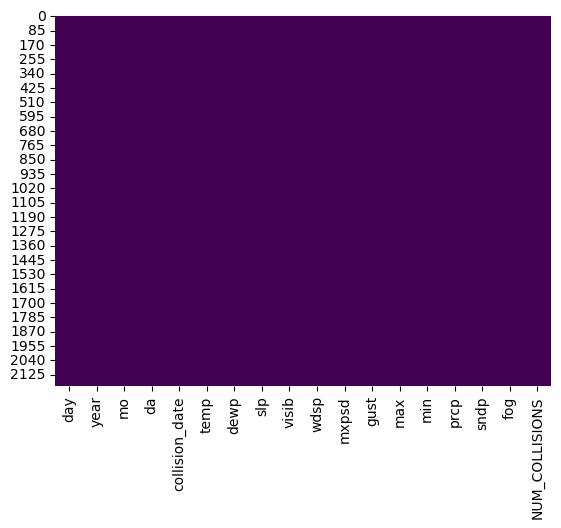

In [28]:
## Missing Values
missing_values = df.isnull().sum()
print(missing_values)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

There are no missing values, which is very good - because it was cleaned for missing data via SQL before imported in this dataset

In data analysis, correlation analysis quantifies the linear relationship between variables, ranging from -1 to 1, indicating the strength and direction of their association. This method is essential for identifying dependencies, allowing us to make informed decisions based on the insights gained from the data.

In [42]:
#set the size of our plots as they are a little small by default.
plt.rcParams["figure.figsize"] = (20,5)

Correlation Matrix:
                     day      year        mo        da      temp      dewp  \
day             1.000000  0.000668  0.000860 -0.000622 -0.012650 -0.022981   
year            0.000668  1.000000 -0.000175  0.000202  0.026165  0.062384   
mo              0.000860 -0.000175  1.000000  0.010979  0.314650  0.334603   
da             -0.000622  0.000202  0.010979  1.000000  0.013436 -0.000627   
temp           -0.012650  0.026165  0.314650  0.013436  1.000000  0.939998   
dewp           -0.022981  0.062384  0.334603 -0.000627  0.939998  1.000000   
slp             0.020577 -0.024119 -0.054598  0.053937 -0.051704 -0.044010   
visib          -0.005339 -0.024504  0.023099  0.005633 -0.080221 -0.069770   
wdsp            0.013014  0.251638  0.207043  0.049401 -0.132660 -0.089775   
mxpsd           0.012961  0.251450  0.205455  0.049289 -0.134376 -0.091141   
gust           -0.003414  0.134637  0.253901  0.000499  0.288181  0.299463   
max            -0.015409  0.035264  0.280899

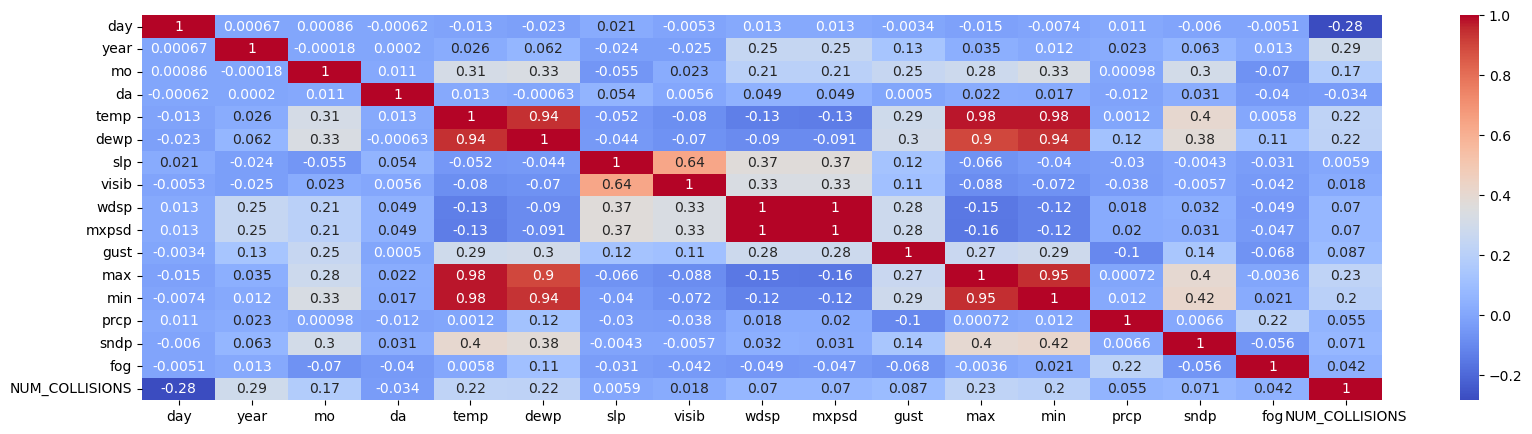

In [327]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

# Convert the 'collision_date' column to datetime format, assuming day/month/year format
if 'collision_date' in df.columns:
    df['collision_date'] = pd.to_datetime(df['collision_date'], dayfirst=True, errors='coerce')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corrMatrix = numeric_df.corr()

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(corrMatrix)

# Set the size of the plot
plt.rcParams["figure.figsize"] = (20, 5)

# Plot the heatmap using seaborn
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()


The analysis reveals that temperature (`temp`), maximum temperature (`max`), and minimum temperature (`min`) have strong positive correlations with each other and moderate positive correlations with the number of collisions (`NUM_COLLISIONS`), indicating that higher temperatures might be associated with an increased number of collisions. Dew point (`dewp`) and snow depth (`sndp`) also show moderate positive correlations with `NUM_COLLISIONS`, suggesting that weather conditions like humidity and snow might influence collision rates. Interestingly, the day of the month (`day`) has a moderate negative correlation with `NUM_COLLISIONS`, indicating a possible cyclical pattern in accident occurrences.

In [417]:
#reset plots heights
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 

Now let's examine the days in the df with the plot functionality. Lets check number of collisions vs. the day of the week. 






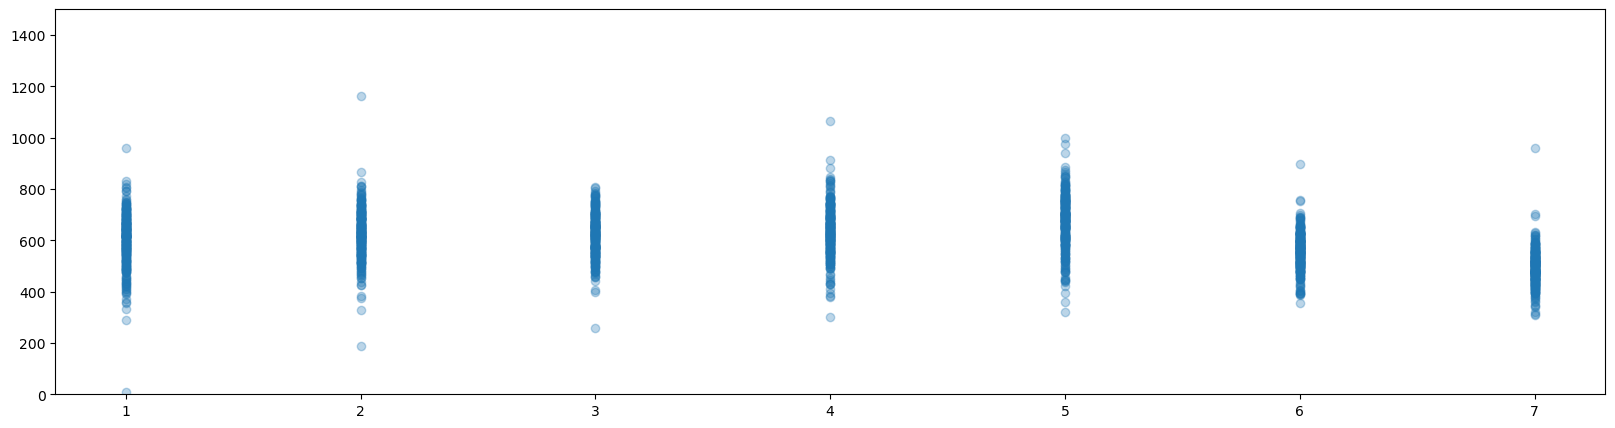

In [329]:
#plotting day against collisions
plt.ylim(0, 1500)
plt.scatter(df.day, df.NUM_COLLISIONS, alpha=0.3) 
plt.show()

There are several outliers on the higher end, representing days with exceptionally high or low values.

# Finding and eliminating outliers

To address outliers, we can use various methods, such as considering the difference between the upper and lower quartiles (IQR) and multiplying it by 1.5 or applying the Z-score method. The IQR approach helps identify values that deviate significantly from the bulk of the data, while the Z-score method detects outliers based on standard deviations from the mean.

Each method has its pros and cons. The IQR method is straightforward and effective for detecting extreme values without assuming a specific data distribution, making it ideal for skewed datasets. However, it might overlook more subtle outliers. The Z-score method, on the other hand, is useful for normally distributed data and can catch outliers that the IQR method might miss. However, it assumes a normal distribution and can be less effective with skewed data.

In this case, we choose the IQR method to focus on the general patterns in our data, avoiding the influence of extreme values. This is particularly relevant when modeling common trends rather than exceptional cases. For a different perspective, in the Dubai real estate dataset, the Z-score method was used to handle outliers, highlighting how different scenarios may benefit from different approaches.

In [331]:
# Finding Outliers
Q1 = df['NUM_COLLISIONS'].quantile(0.25)
Q3 = df['NUM_COLLISIONS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['NUM_COLLISIONS'] >= lower_bound) & (df['NUM_COLLISIONS'] <= upper_bound)]

# Calculate metrics for the original and cleaned datasets
original_cases = len(df)
cleaned_cases = len(df_cleaned)
removed_cases = original_cases - cleaned_cases

original_mean = df.NUM_COLLISIONS.mean()
cleaned_mean = df_cleaned.NUM_COLLISIONS.mean()
mean_difference = cleaned_mean - original_mean

# Print the metrics
print("Original Dataset:")
print("Number of cases:", original_cases)
print("Mean NUM_COLLISIONS:", original_mean)

print("\nCleaned Dataset:")
print("Number of cases:", cleaned_cases)
print("Mean NUM_COLLISIONS:", cleaned_mean)

print("\nRemoved Cases:", removed_cases)
print("Mean Difference:", mean_difference)


Original Dataset:
Number of cases: 2191
Mean NUM_COLLISIONS: 602.1218621633957

Cleaned Dataset:
Number of cases: 2171
Mean NUM_COLLISIONS: 601.7065868263473

Removed Cases: 20
Mean Difference: -0.4152753370483424


This method identified and removed 20 outliers from our dataset. The dataframe "df" has now been transformed into the dataset "df_cleaned".
And this is how the new dataset looks like:

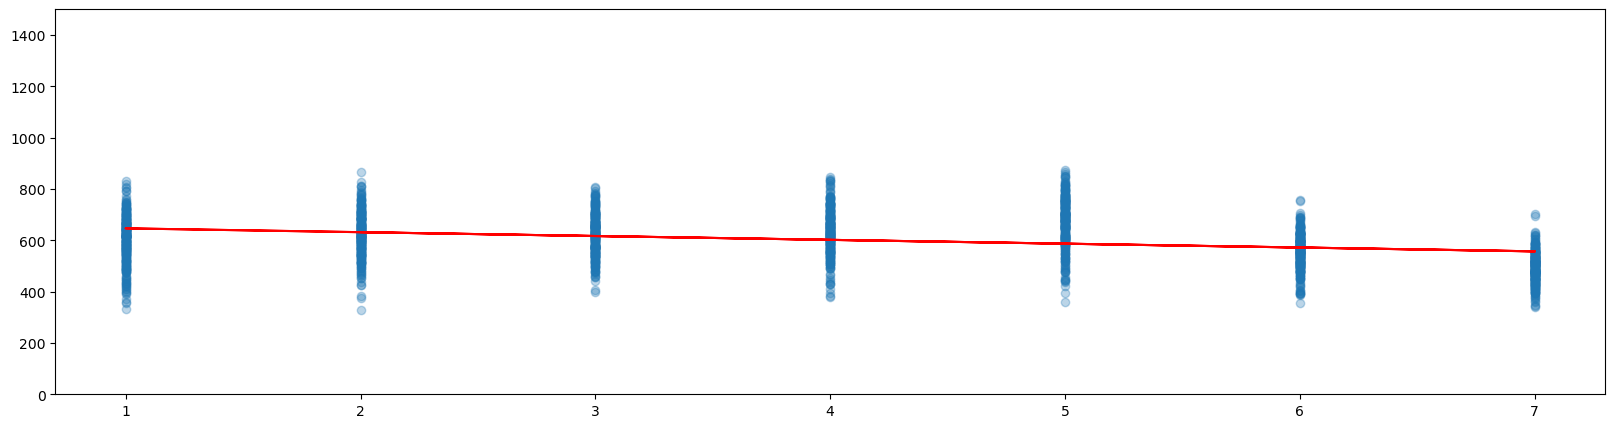

In [333]:
# Plotting cleaned data
plt.ylim(0, 1500)
plt.scatter(df_cleaned.day, df_cleaned.NUM_COLLISIONS, alpha=0.3)
coefficients = np.polyfit(df_cleaned.day, df_cleaned.NUM_COLLISIONS, 1)
line_equation = np.poly1d(coefficients)
plt.plot(df_cleaned.day, line_equation(df_cleaned.day), color='red')
plt.show()


**Interpretation Scatterplot**
The scatter plot illustrates the distribution of NUM_COLLISIONS across different days, revealing significant variations. The inclusion of a red regression line indicates a slight downward trend. This can be attributed to the lower values observed on days 6 and 7 (Saturday and Sunday)

Correlation Matrix:
                     day      year        mo        da  collision_date  \
day             1.000000  0.000201  0.001854  0.003341        0.000549   
year            0.000201  1.000000 -0.001658  0.000713        0.986159   
mo              0.001854 -0.001658  1.000000  0.006557        0.163580   
da              0.003341  0.000713  0.006557  1.000000        0.015662   
collision_date  0.000549  0.986159  0.163580  0.015662        1.000000   
temp           -0.012499  0.026598  0.315705  0.011614        0.078118   
dewp           -0.022678  0.063107  0.336055 -0.002124        0.117383   
slp             0.025975 -0.020498 -0.048921  0.052582       -0.027535   
visib          -0.001435 -0.021397  0.029654  0.003309       -0.016139   
wdsp            0.019042  0.252002  0.208853  0.045280        0.283763   
mxpsd           0.019009  0.251806  0.207222  0.045156        0.283299   
gust           -0.000657  0.135069  0.256337 -0.003180        0.175465   
max            -0.

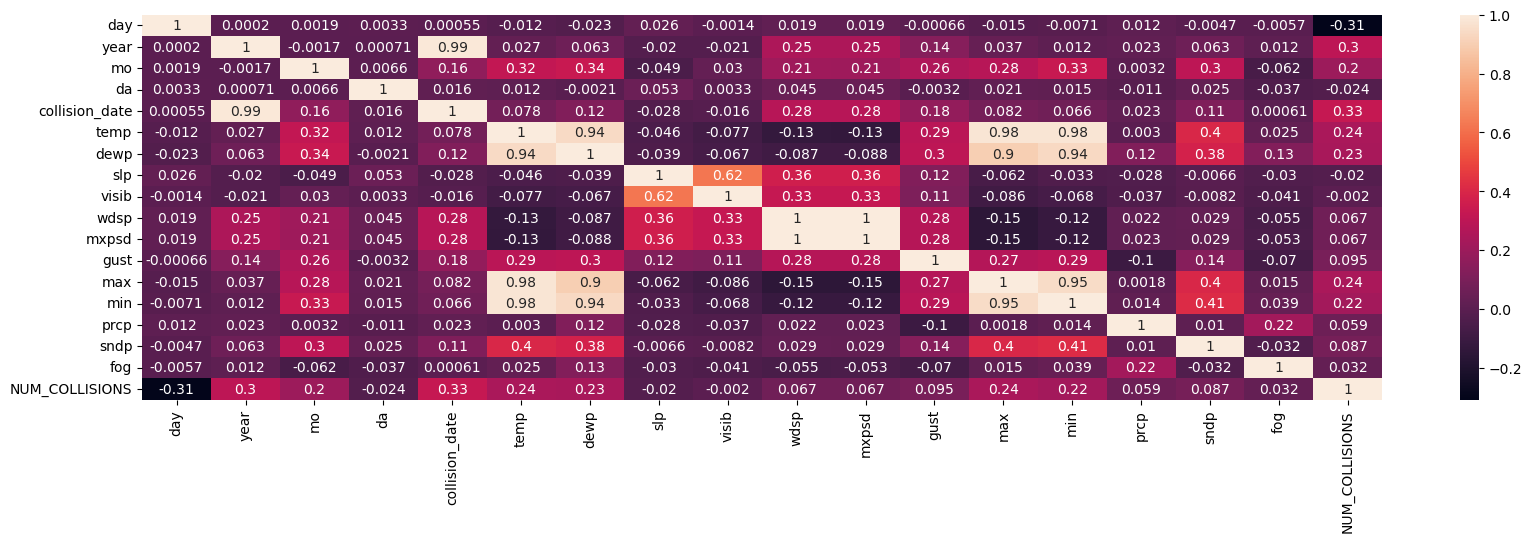

In [335]:
#new correlation Matrix
plt.rcParams["figure.figsize"] = (20,5)
corrMatrix = df_cleaned.corr()

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(corrMatrix)

#based on seaborn
sn.heatmap(corrMatrix, annot=True)
alt = "YOLO"
plt.show()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 

As a result of this data adjustment, the correlation between days and the number of collisions has changed significantly. We now observe a negative correlation of -0.31.






In [337]:
# Calculate and compare correlations with cleaned dataset and original dataset (raw)
correlation_cleaned = df_cleaned.corr()["NUM_COLLISIONS"]
correlation= df.corr()["NUM_COLLISIONS"]
correlation_diff = correlation - correlation_cleaned

# Create a DataFrame to compare the correlations
correlation_table = pd.DataFrame({
    "Correlation with Cleaned Dataset": correlation_cleaned, 
    "Correlation with Raw Dataset": correlation,
    "Difference": correlation_diff
})

# Display the correlation table
print(correlation_table)


                Correlation with Cleaned Dataset  \
day                                    -0.308751   
year                                    0.301613   
mo                                      0.198041   
da                                     -0.023682   
collision_date                          0.329782   
temp                                    0.242643   
dewp                                    0.234694   
slp                                    -0.020293   
visib                                  -0.001988   
wdsp                                    0.067192   
mxpsd                                   0.066814   
gust                                    0.094590   
max                                     0.242251   
min                                     0.221196   
prcp                                    0.059015   
sndp                                    0.087279   
fog                                     0.031671   
NUM_COLLISIONS                          1.000000   

           

After removing outliers from the dataset, the correlations between "NUM_COLLISIONS" and other variables changed, indicating that the outliers were impacting these relationships. These changes can be beneficial if they lead to a more accurate representation of the data, or detrimental if significant patterns were lost in the process.

Let's take a look at the mean values of collisions per day within the dataset.






Collisions by day:
   day        Mean  Median
0    1  604.954839   616.0
1    2  626.501608   627.0
2    3  622.224359   626.0
3    4  633.877023   633.0
4    5  671.457792   681.0
5    6  558.839744   562.5
6    7  494.362460   493.0


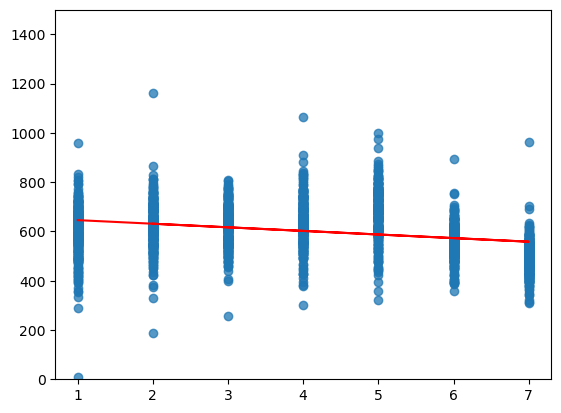

In [341]:
# Calculate the mean and median values
mean_collisions_by_day = df_cleaned.groupby('day')['NUM_COLLISIONS'].mean().reset_index().rename(columns={'NUM_COLLISIONS': 'Mean'})
median_collisions_by_day = df_cleaned.groupby('day')['NUM_COLLISIONS'].median().reset_index().rename(columns={'NUM_COLLISIONS': 'Median'})

# Merge the mean and median dataframes
collisions_by_day = pd.merge(mean_collisions_by_day, median_collisions_by_day, on='day')

# Display the table
print("Collisions by day:")
print(collisions_by_day)

#Plotting
plt.ylim(0, 1500)
plt.scatter(df.day, df.NUM_COLLISIONS, alpha=0.75)
coefficients = np.polyfit(df.day, df.NUM_COLLISIONS, 1)
line_equation = np.poly1d(coefficients)
plt.plot(df.day, line_equation(df.day), color='red')
plt.show()


The data reveals that collisions peak on Fridays (day 5) with an average of 671.46, followed by Thursdays (day 4) at 633.88, while Sundays (day 7) see the fewest collisions, averaging 494.36. These insights highlight weekly collision patterns, aiding businesses in resource allocation. The median also aligns with these observations, reinforcing the findings.

# Reordering the "day" Variable

Analyzing the mean values of "NUM_COLLISIONS" across different days reveals patterns that might not fully reflect real-world business operations or traffic trends due to the current order of days in the dataset.

To gain more accurate insights, the days in the dataset will be reordered to better align with the typical business week. This adjustment is expected to enhance the relevance of the analysis, providing more actionable insights and improving decision-making.

Reordering the dataset logically will better mirror actual conditions, leading to more precise and meaningful findings.

In [82]:
#df_cleaned.loc[df['day'] > 0, 'day'] = df_cleaned['day']+2 # change all days by adding 2 
#df_cleaned.loc[df['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1
#df_cleaned.loc[df['day'] == 9, 'day'] = 2 # change days that equal 9 to day 2

In [350]:
# Mapping the days to the new desired order
day_mapping = {
    6: 0,  # Saturday becomes Day 0
    7: 1,  # Sunday becomes Day 1
    1: 2,  # Monday becomes Day 2
    2: 3,  # Tuesday becomes Day 3
    3: 4,  # Wednesday becomes Day 4
    4: 5,  # Thursday becomes Day 5
    5: 6   # Friday becomes Day 7
}

# Create a new DataFrame df_cs based on df_cleaned with the reordered days
# Dataframe CS means Cleared and Sorted
df_cs = df_cleaned.copy()

# Apply the mapping to reorder the days in the new DataFrame
df_cs['day'] = df_cs['day'].map(day_mapping)

# Optionally, sort the DataFrame by the new day order
df_cs = df_cs.sort_values('day').reset_index(drop=True)

# Display the new DataFrame to confirm the changes
print(df_cs.head())



   day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
0    0  2016   1   2     2016-01-02  35.8  17.7  1016.9   10.0   6.0   12.0   
1    0  2014  12  20     2014-12-20  31.7  19.1  1023.9   10.0   4.8    8.0   
2    0  2018   3  10     2018-03-10  35.7  19.9  1012.3   10.0   7.7   12.0   
3    0  2013  10  19     2013-10-19  58.3  42.0  1013.6   10.0   2.2    6.0   
4    0  2014  12  27     2014-12-27  47.7  30.1  1022.9   10.0   3.5    7.0   

    gust   max   min  prcp   sndp  fog  NUM_COLLISIONS  
0   18.1  42.1  32.0   0.0  999.9    0             422  
1   15.0  37.9  30.0   0.0  999.9    0             505  
2   22.0  42.1  30.0   0.0    2.0    0             567  
3  999.9  68.0  52.0   0.0  999.9    0             471  
4  999.9  55.0  39.9   0.0  999.9    0             406  


In [424]:
# Mapping the days to the new desired order
day_mapping = {
    6: 0,  # Saturday becomes Day 0
    7: 1,  # Sunday becomes Day 1
    1: 2,  # Monday becomes Day 2
    2: 3,  # Tuesday becomes Day 3
    3: 4,  # Wednesday becomes Day 4
    4: 5,  # Thursday becomes Day 5
    5: 6   # Friday becomes Day 7
}

# Create a new DataFrame df_cs based on df_cleaned with the reordered days
# Dataframe 1 is cleared and sorted but as a backup, because in the next steps , we need df_cs and will eliminate a lot of data
df_0 = df_cleaned.copy()

# Apply the mapping to reorder the days in the new DataFrame
df_0['day'] = df_0['day'].map(day_mapping)

# Optionally, sort the DataFrame by the new day order
df_0 = df_0.sort_values('day').reset_index(drop=True)

# Display the new DataFrame to confirm the changes
print(df_0.head())

   day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
0    0  2016   1   2     2016-01-02  35.8  17.7  1016.9   10.0   6.0   12.0   
1    0  2014  12  20     2014-12-20  31.7  19.1  1023.9   10.0   4.8    8.0   
2    0  2018   3  10     2018-03-10  35.7  19.9  1012.3   10.0   7.7   12.0   
3    0  2013  10  19     2013-10-19  58.3  42.0  1013.6   10.0   2.2    6.0   
4    0  2014  12  27     2014-12-27  47.7  30.1  1022.9   10.0   3.5    7.0   

    gust   max   min  prcp   sndp  fog  NUM_COLLISIONS  
0   18.1  42.1  32.0   0.0  999.9    0             422  
1   15.0  37.9  30.0   0.0  999.9    0             505  
2   22.0  42.1  30.0   0.0    2.0    0             567  
3  999.9  68.0  52.0   0.0  999.9    0             471  
4  999.9  55.0  39.9   0.0  999.9    0             406  


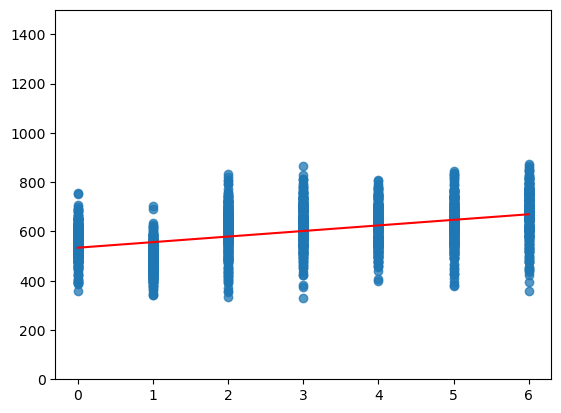

In [352]:
# Plotting
plt.ylim(0, 1500)

# Use 'df_cleaned.day' instead of 'df.day'
plt.scatter(df_cs.day, df_cs.NUM_COLLISIONS, alpha=0.75)

# Plot the trend line
plt.plot(np.unique(df_cs.day), np.poly1d(np.polyfit(df_cs.day, df_cs.NUM_COLLISIONS, 1))(np.unique(df_cs.day)), color='red')

plt.show()


The rearranged order of days in the new scatter plot reveals a more distinct trend. This is highlighted by the red regression line, which shows a steeper upward slope, indicating a clearer and more defined pattern.





# Enhancing Correlation

This approach uncovers promising correlations that could be further strengthened. Adjusting the order of variables, as learned, can improve data interpretability. This is an initial effort to achieve that.

Correlation Matrix:
                     day      year        mo        da  collision_date  \
day             1.000000  0.000201  0.001854  0.003341        0.000549   
year            0.000201  1.000000 -0.001658  0.000713        0.986159   
mo              0.001854 -0.001658  1.000000  0.006557        0.163580   
da              0.003341  0.000713  0.006557  1.000000        0.015662   
collision_date  0.000549  0.986159  0.163580  0.015662        1.000000   
temp           -0.012499  0.026598  0.315705  0.011614        0.078118   
dewp           -0.022678  0.063107  0.336055 -0.002124        0.117383   
slp             0.025975 -0.020498 -0.048921  0.052582       -0.027535   
visib          -0.001435 -0.021397  0.029654  0.003309       -0.016139   
wdsp            0.019042  0.252002  0.208853  0.045280        0.283763   
mxpsd           0.019009  0.251806  0.207222  0.045156        0.283299   
gust           -0.000657  0.135069  0.256337 -0.003180        0.175465   
max            -0.

<Axes: >

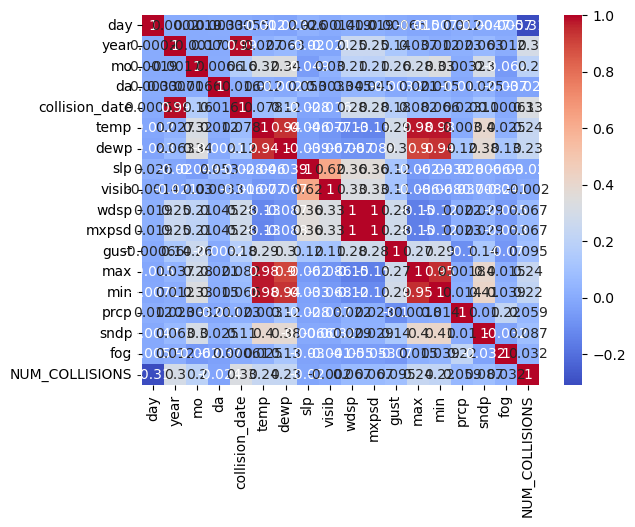

In [94]:
import seaborn as sns #import again (sometimes an error occur)

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(corrMatrix)

correlation_matrix = df_cs.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



**Interpretation** When considering the correlations of the variable "NUM_COLLISIONS," we observe several significant associations. As mentioned earlier, there is a correlation with the day of the week (day). In addition, further analysis is warranted for the variables Year (+0.3), Month (+0.02), Temperature (+0.24), and Dew Point (+0.23), as they also exhibit noteworthy correlations. These findings provide a solid basis for further investigation and can offer valuable insights.

For the remaining variables, the correlations are relatively small, indicating that further in-depth research may not be warranted. Instead, it would be more prudent to allocate our resources towards exploring the more promising variables identified earlier. By prioritizing our efforts, we can maximize the potential for meaningful insights and more targeted analysis.

#Applying Initial Findings to Explore Correlations in the Data

Based on the initial findings, it is evident that the **date entries** play a crucial role in understanding the data. Additionally, **temperature** emerges as an intriguing variable with potential for linear regression analysis. However, the complexity of the entire dataset requires the use of a **deep neural network (DNN)** to capture smaller patterns that simple **linear regression** may overlook. The effectiveness and precision of the DNN compared to linear regression or **multivariate linear regression** remain to be seen.

# Checking the other variables

# temperature

In the dataset, the **temperature** refers to the average temperature for the day in degrees Fahrenheit to tenths. Fahrenheit is a temperature scale commonly used in the United States. To understand the distribution of temperature in the dataset, we can create a plot to visualize it.

Fahrenheit is a scale where the freezing point of water is 32 degrees and the boiling point is 212 degrees. It is important to note that Fahrenheit temperatures are typically higher than equivalent Celsius temperatures. For example, 32 degrees Fahrenheit is equivalent to 0 degrees Celsius, and 212 degrees Fahrenheit is equivalent to 100 degrees Celsius.

By examining the temperature data, we can identify periods when it snows or when it is warm for people. For instance, temperatures below the freezing point of 32 degrees Fahrenheit (0 degrees Celsius) are indicative of snowfall. On the other hand, temperatures above a certain threshold, such as 70 degrees Fahrenheit (21 degrees Celsius), are considered warm for most people.

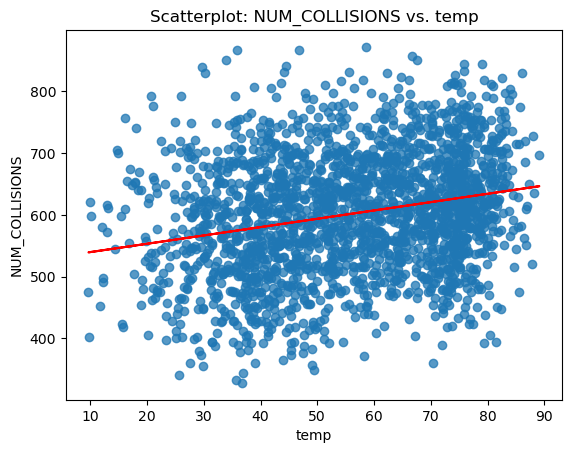

In [96]:
plt.scatter(df_cleaned['temp'], df_cleaned['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cleaned['temp'], np.poly1d(np.polyfit(df_cleaned['temp'], df_cleaned['NUM_COLLISIONS'], 1))(df_cleaned['temp']), color='red')
plt.xlabel('temp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. temp')
plt.show()


The dataset exhibits a wide distribution of temperatures. We observe a slight positive correlation within the dataset, which is depicted by the red line. To some extent, we can infer that as temperatures increase, the number of collisions tends to rise.

This observation suggests a potential relationship between temperature and collision occurrences. Warmer temperatures may contribute to increased traffic volume, which could result in a higher likelihood of collisions. However, it is important to note that correlation does not imply causation, and there may be other factors at play.

Further analysis and exploration are needed to determine the underlying factors influencing this correlation and to establish a more comprehensive understanding of the relationship between temperature and collision occurrences.

**interpretation**

The correlation between warmer temperatures and increased collision occurrences in NYC can be attributed to several factors:

*Higher Traffic Volume: Warmer weather often encourages people to venture outdoors, leading to an increase in overall traffic volume. With more vehicles on the road, the probability of collisions naturally rises.

*Increased Travel: Pleasant weather conditions tend to motivate people to travel more, whether for leisure or commuting purposes. This heightened travel activity contributes to a greater number of vehicles on the road, thus increasing the likelihood of collisions.

*Outdoor Activities: Warm weather entices individuals to engage in outdoor activities, such as cycling, walking, or participating in sports. These activities introduce more vulnerable road users, which can potentially result in accidents involving vehicles.

*Road Maintenance: Warmer temperatures allow for better road conditions, as ice and snow are less prevalent. This improved road quality facilitates smoother driving conditions, leading to higher speeds and potentially an increased risk of collisions.

However, it is important to consider that the relationship between temperature and collision occurrences is not always straightforward, and there are factors that may counterbalance or mitigate this correlation:

*Driver Behavior: Different weather conditions can influence driver behavior. While warmer weather may encourage more drivers on the road, it can also lead to more cautious driving behavior, reducing the likelihood of collisions.

*Seasonal Factors: Other seasonal factors, such as holidays or school breaks, can significantly impact traffic patterns and collision rates. These factors may overshadow the direct influence of temperature on collision occurrences.

*Infrastructure and Traffic Management: Effective infrastructure planning, road design, and traffic management measures can mitigate the impact of temperature on collision occurrences. Well-designed roads, traffic signals, and enforcement of traffic regulations can contribute to safer road conditions regardless of temperature.

# dewp

The **mean dew point for the day** represents the average temperature to which air must be cooled in order to reach saturation and form dew. It is measured in degrees Fahrenheit to tenths. A higher dew point indicates a greater amount of moisture in the air, which can lead to increased humidity and potentially affect human comfort and outdoor activities.






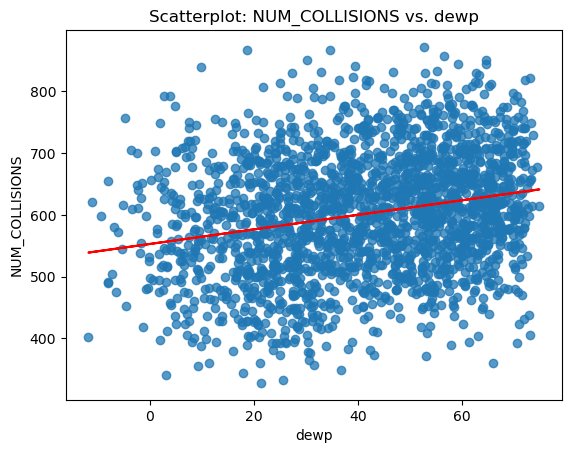

In [100]:
plt.scatter(df_cleaned['dewp'], df_cleaned['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cleaned['dewp'], np.poly1d(np.polyfit(df_cleaned['dewp'], df_cleaned['NUM_COLLISIONS'], 1))(df_cleaned['dewp']), color='red')
plt.xlabel('dewp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. dewp')
plt.show()


**Interpretation** The variable "mean dew point"coudld be closely related to temperature and also reflects the moisture content in the air. A higher mean dew point indicates higher humidity, which can affect comfort and outdoor activities. In combination with temperature, the dew point can help provide a more comprehensive understanding of weather conditions and their impact on traffic collisions.

# slp

The **mean sea level pressure** variable measures atmospheric pressure at sea level in millibars, offering insights into weather patterns and conditions. Variations in sea level pressure can signal high or low-pressure systems, affecting weather events like storms or calm periods. Analyzing this variable helps in understanding atmospheric dynamics and their potential impact on traffic collisions.

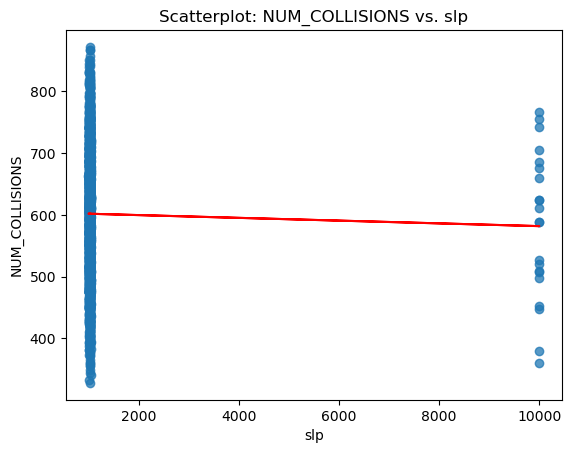

In [102]:
plt.scatter(df_cleaned['slp'], df_cleaned['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cleaned['slp'], np.poly1d(np.polyfit(df_cleaned['slp'], df_cleaned['NUM_COLLISIONS'], 1))(df_cleaned['slp']), color='red')
plt.xlabel('slp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. slp')
plt.show()


Missing values are represented as 9999.9, which can distort the accuracy of analyses and interpretations. Properly addressing these missing values is crucial to maintaining the integrity of data analysis and modeling.

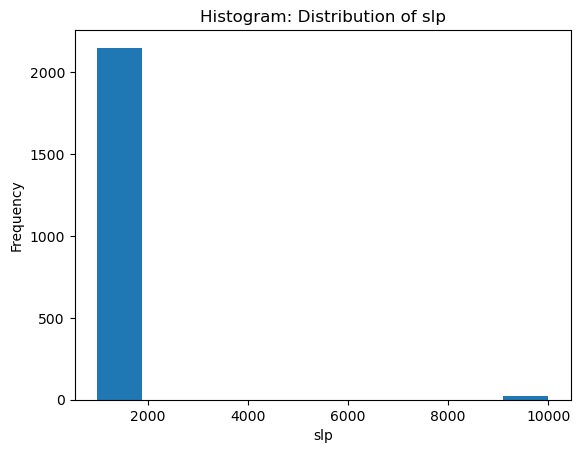

In [104]:
import matplotlib.pyplot as plt

plt.hist(df_cleaned['slp'], bins=10)
plt.xlabel('slp')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of slp')
plt.show()


To visualize the distribution of the "mean sea level pressure" variable, a histogram is created. The histogram reveals numerous values below 2000, indicating potential significance for analysis. Proper handling of these missing values is essential to ensure accurate and meaningful insights from the data.

In [106]:
slp_over_2000 = df_cleaned[df_cleaned['slp'] > 2000]['slp'].value_counts().reset_index()
slp_over_2000.columns = ['Value', 'Frequency']
slp_over_2000 = slp_over_2000.sort_values('Value')

print(slp_over_2000)


    Value  Frequency
0  9999.9         21


We eliminate the missing values, which are represented as 9999.9. There are 21 values with this representation. Although the number of these values may seem small compared to the overall frequency of the remaining data, it is important to note that a few extreme values can disproportionately influence a dataset when calculating interval-scaled data. Therefore, it is necessary to remove these extreme values from the dataset to ensure a more balanced and accurate analysis.

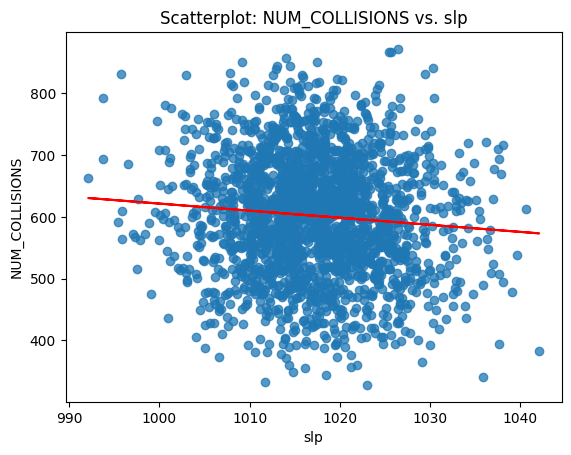

In [432]:
#cleaning the data
df = df[df['slp'] <= 9000] 

#plotting again
plt.scatter(df['slp'], df['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df['slp'], np.poly1d(np.polyfit(df['slp'], df['NUM_COLLISIONS'], 1))(df['slp']), color='red')
plt.xlabel('slp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. slp')
plt.show()

Without these errors, the plot looks quite different. We can observe a concentration in the middle and a slight negative correlation (indicated by the red line). So far, this looks promising.






# visib

**Mean visibility for the day in miles to tenths**. Missing = 999.9. Visibility refers to the distance at which objects or landmarks can be clearly seen in the atmosphere. In this dataset, the mean visibility is measured in miles and recorded to the nearest tenth. The missing value of 999.9 indicates that the visibility data is not available for certain days.






As explained earlier, we follow a similar approach for this variable. We identify the missing values that have a value close to 1000. We examine the quantities using a histogram, which is not necessarily required since we will be removing the data anyway. However, histograms help us visualize the frequencies and gain a better understanding of the data.






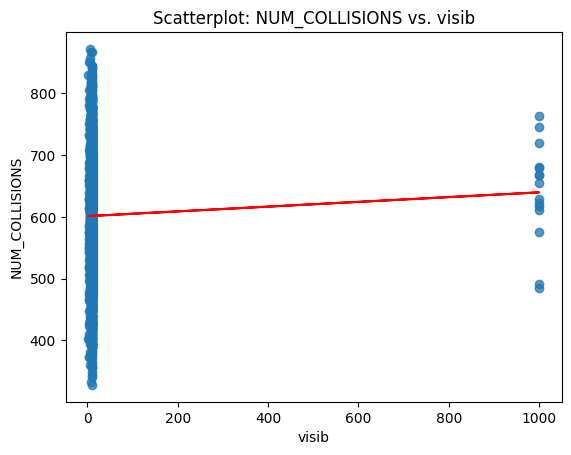

In [433]:
plt.scatter(df['visib'], df['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df['visib'], np.poly1d(np.polyfit(df['visib'], df['NUM_COLLISIONS'], 1))(df['visib']), color='red')
plt.xlabel('visib')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. visib')
plt.show()

In [111]:
# Cleaning the data
df_cleaned = df_cleaned[df_cleaned['visib'] <= 200]

count_over_200 = len(df_cleaned[df_cleaned['visib'] > 200])
print("Number of values over 200 in the 'visib' variable:", count_over_200)

# All clear


Number of values over 200 in the 'visib' variable: 0


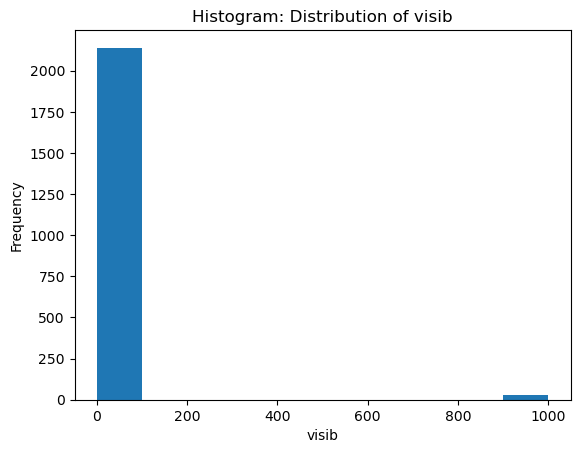

In [354]:
#creating a histogramm
import matplotlib.pyplot as plt

plt.hist(df_cs['visib'], bins=10)
plt.xlabel('visib')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of visib')
plt.show()

The dataset is cleaned and the histogram examined, revealing that it does not follow a normal distribution.

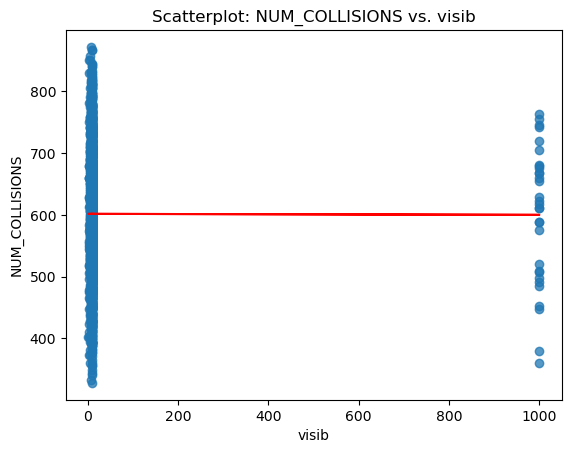

In [357]:
# Plotting again
plt.scatter(df_cs['visib'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['visib'], np.poly1d(np.polyfit(df_cs['visib'], df_cs['NUM_COLLISIONS'], 1))(df_cs['visib']), color='red')
plt.xlabel('visib')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. visib')
plt.show()


Similar to the previous analysis, missing values are marked as 9999.99, which can negatively impact the results. After addressing these, the dataset shows an improvement, with smaller values occurring less frequently. However, this distortion still affects the accuracy of the calculations.

# wdsp

The **mean wind speed** variable provides information about the daily wind conditions in knots. Maybe it is an important factor to consider when examining the relationship between weather conditions and collision incidents. By analyzing the distribution of wind speeds, we can identify any patterns or trends that may contribute to the occurrence of collisions. Additionally, removing the missing values associated with this variable ensures the accuracy and reliability of our analysis. This allows us to gain valuable insights into how wind speed influences collision occurrences and make informed decisions for our business case.

Similar to the previous variables, we identify and handle the missing values in the mean **wind speed** variable. By examining the resulting data, we can ensure the integrity and accuracy of our analysis. It is important to address missing values as they can potentially introduce bias and impact the validity of our findings. With the cleaned dataset, we can proceed with further analysis and explore the relationship between wind speed and collision incidents more effectively.

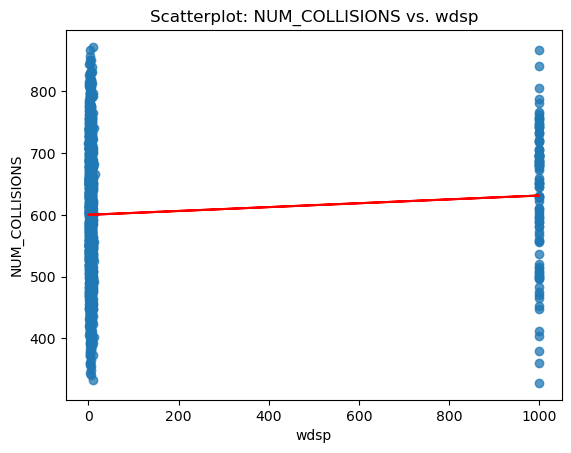

In [359]:
plt.scatter(df_cs['wdsp'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['wdsp'], np.poly1d(np.polyfit(df_cs['wdsp'], df_cs['NUM_COLLISIONS'], 1))(df_cs['wdsp']), color='red')
plt.xlabel('wdsp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. wdsp')
plt.show()


Missing values in the mean wind speed variable can skew the analysis, so they are removed to ensure accuracy and reliability in the results.

In [361]:
# Cleaning the data
df_cs = df_cs[df_cs['wdsp'] <= 200]

count_over_200 = len(df_cs[df_cs['wdsp'] > 200])
print("Number of values over 200 in the 'wdsp' variable:", count_over_200)


Number of values over 200 in the 'wdsp' variable: 0


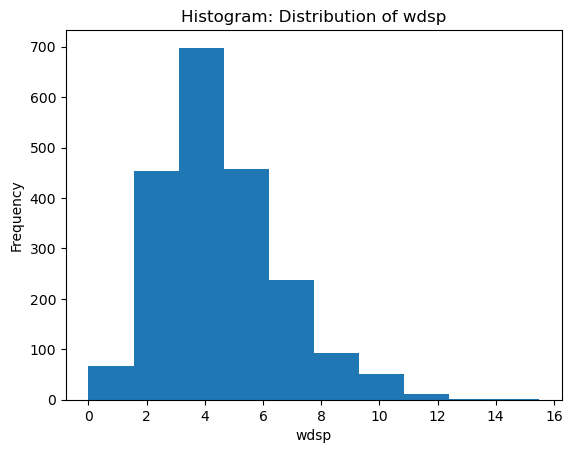

In [363]:
#creating a histogramm
import matplotlib.pyplot as plt

plt.hist(df_cs['wdsp'], bins=10)
plt.xlabel('wdsp')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of wdsp')
plt.show()

The distribution of the mean wind speed variable is nearly normal, centered around a value of 4, which suggests a relatively balanced distribution of wind speeds—a positive indication for the analysis.

Text(0.5, 1.0, 'Scatterplot: NUM_COLLISIONS vs. wdsp')

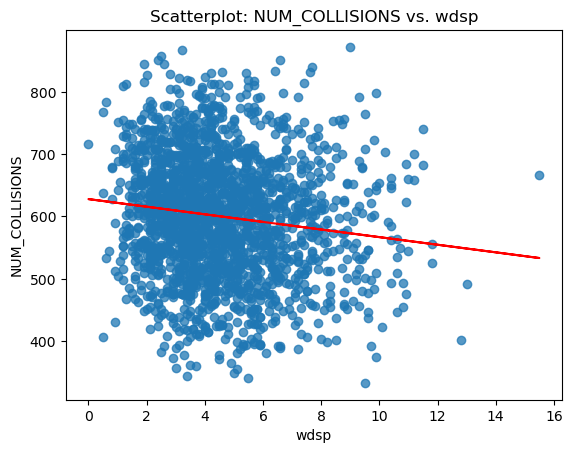

In [369]:
plt.scatter(df_cs['wdsp'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['wdsp'], np.poly1d(np.polyfit(df_cs['wdsp'], df_cs['NUM_COLLISIONS'], 1))(df_cs['wdsp']), color='red')
plt.xlabel('wdsp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. wdsp')


Nice analysis, the data looks good. They are well distributed. A negative correlation is visible.






# gust

The variable **Maximum wind gust reported for the day in knots to tenths** provides data on the highest wind gust recorded each day. However, some values are missing, marked by 999.9. To maintain the accuracy and reliability of the analysis, these missing values need to be addressed. We will examine the distribution and patterns of this variable to understand its potential impact on collision risk and costs. Given the prevalence of missing values, likely due to challenges in measuring gusts accurately, these will be removed to ensure the integrity of the data.

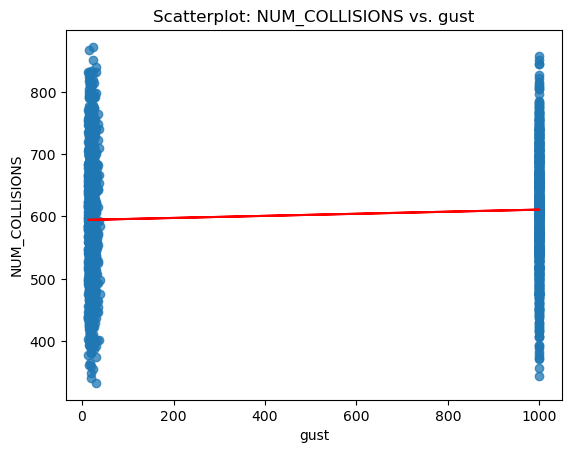

In [371]:
plt.scatter(df_cs['gust'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['gust'], np.poly1d(np.polyfit(df_cs['gust'], df_cs['NUM_COLLISIONS'], 1))(df_cs['gust']), color='red')
plt.xlabel('gust')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. gust')
plt.show()


In [377]:
# Cleaning the data
df_cs = df_cs[df_cs['gust'] <= 200]

count_over_200 = len(df_cs[df_cs['gust'] > 200])
print("Number of values over 200 in the 'gust' variable:", count_over_200)

# All clear


Number of values over 200 in the 'gust' variable: 0


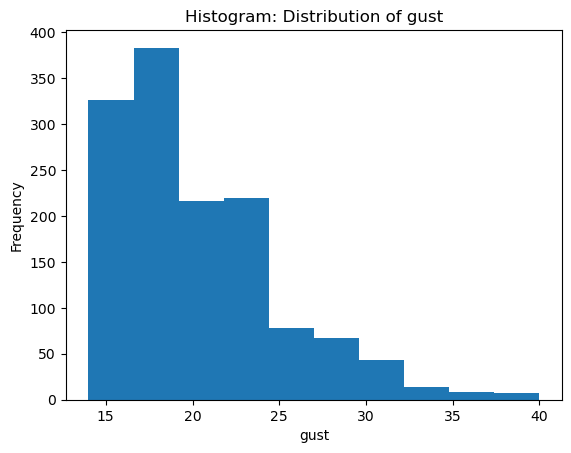

In [379]:
#creating a histogramm
import matplotlib.pyplot as plt

plt.hist(df_cs['gust'], bins=10)
plt.xlabel('gust')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of gust')
plt.show()

Great distribution. Normally distributed. This provides us with a potential opportunity for analysis and modeling.

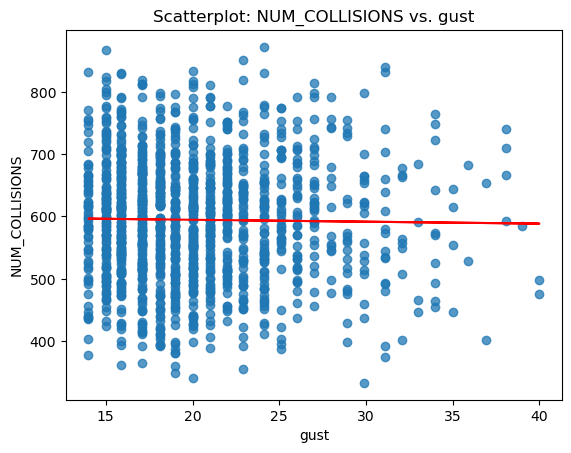

In [381]:
plt.scatter(df_cs['gust'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['gust'], np.poly1d(np.polyfit(df_cs['gust'], df_cs['NUM_COLLISIONS'], 1))(df_cs['gust']), color='red')
plt.xlabel('gust')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. gust')
plt.show()


The correlation line is nearly flat, suggesting that despite the numerous data points, the variance in the "NUM_COLLISIONS" variable may not be significantly influenced by "gust."

# sndp


The **sndp** variable measures snow depth in inches, with missing values marked as 999.9, often appearing on days without reported snowfall. In NYC, especially during colder seasons, snow accumulation is common, making it important to consider these conditions in analysis.

To ensure accurate insights, an outlier analysis was conducted, and outliers were removed before reanalyzing the data. This approach allowed for a clearer identification of patterns and relationships, providing a more reliable foundation for further analysis and modeling.

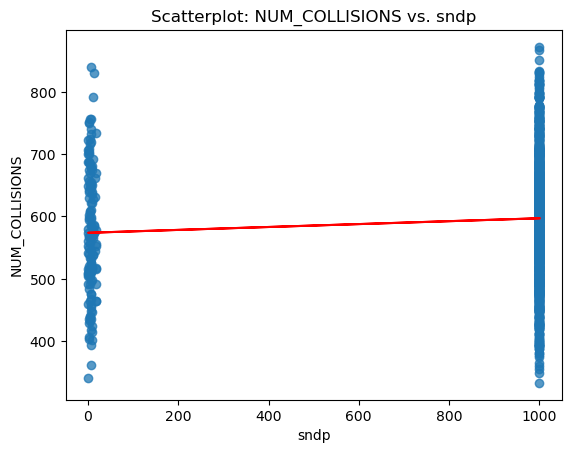

In [383]:
plt.scatter(df_cs['sndp'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['sndp'], np.poly1d(np.polyfit(df_cs['sndp'], df_cs['NUM_COLLISIONS'], 1))(df_cs['sndp']), color='red')
plt.xlabel('sndp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. sndp')
plt.show()


In [385]:
# Cleaning the data
df_cs = df_cs[df_cs['sndp'] <= 200]

count_over_200 = len(df_cs[df_cs['sndp'] > 200])
print("Number of values over 200 in the 'sndp' variable:", count_over_200)

# All clear


Number of values over 200 in the 'sndp' variable: 0


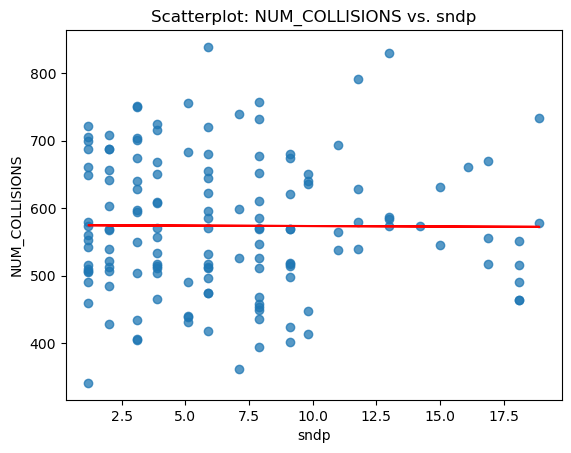

In [387]:
plt.scatter(df_cs['sndp'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['sndp'], np.poly1d(np.polyfit(df_cs['sndp'], df_cs['NUM_COLLISIONS'], 1))(df_cs['sndp']), color='red')
plt.xlabel('sndp')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. sndp')
plt.show()


The correlation between this variable and the target variable is weak, suggesting limited predictive value in a simple regression analysis. However, it may still be useful in a more complex model like a Deep Neural Network (DNN), where it could help capture intricate patterns. The removal of outliers led to a reduction in data, which, while potentially affecting sample size and representativeness, ultimately allows for a cleaner and more robust analysis by minimizing the influence of extreme values. Further exploration of the impact of this data reduction is warranted.

# fog

The indicators for **fog** occurrence during the day provide information about whether fog was present or not. While New York City is not particularly known for foggy conditions like San Francisco, it is interesting to note that fog occurrences have been captured in the dataset. It is worth mentioning that the dataset also contains missing values for this variable, which may need to be addressed during the analysis.

Indeed, unlike the other variables in the dataset, a relative "high" value of 1.0 for the fog indicator does not indicate a missing value. Instead, it represents the presence of fog during the day. It is important to keep this distinction in mind while analyzing the data to avoid any misinterpretations or inaccuracies in the results.

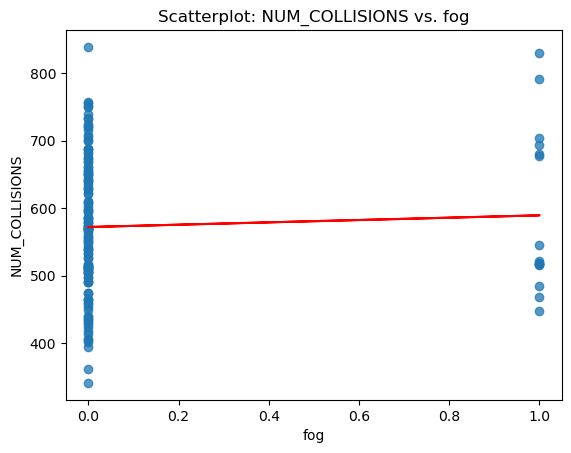

In [389]:
plt.scatter(df_cs['fog'], df_cs['NUM_COLLISIONS'], alpha=0.75)
plt.plot(df_cs['fog'], np.poly1d(np.polyfit(df_cs['fog'], df_cs['NUM_COLLISIONS'], 1))(df_cs['fog']), color='red')
plt.xlabel('fog')
plt.ylabel('NUM_COLLISIONS')
plt.title('Scatterplot: NUM_COLLISIONS vs. fog')
plt.show()


The fog variable is a **binary indicator** representing the presence or absence of fog during the day. A value of 1 indicates the presence of fog (yes), while a value of 0 indicates the absence of fog (no). It is a categorical variable that provides information on whether foggy conditions were observed on a given day.

In [391]:
fog_counts = df_cs['fog'].value_counts()
fog_table = pd.DataFrame({'Value': fog_counts.index, 'Frequency': fog_counts.values})
print(fog_table)


   Value  Frequency
0      0        129
1      1         16


There were not many instances of fog reported in the data (n=16). Overall, the fog variable does not appear to be highly informative in predicting the number of collisions. Its limited occurrence suggests that foggy conditions may not have a strong influence on collision rates in this dataset.

# Correlation with cleaned data

After a comprehensive data cleaning process, the key variables in our dataset are now free of missing values. This sets a strong foundation for further analysis. Let's examine the cleaned dataset in more detail.

Correlation Matrix:
                     day      year        mo        da  collision_date  \
day             1.000000  0.000201  0.001854  0.003341        0.000549   
year            0.000201  1.000000 -0.001658  0.000713        0.986159   
mo              0.001854 -0.001658  1.000000  0.006557        0.163580   
da              0.003341  0.000713  0.006557  1.000000        0.015662   
collision_date  0.000549  0.986159  0.163580  0.015662        1.000000   
temp           -0.012499  0.026598  0.315705  0.011614        0.078118   
dewp           -0.022678  0.063107  0.336055 -0.002124        0.117383   
slp             0.025975 -0.020498 -0.048921  0.052582       -0.027535   
visib          -0.001435 -0.021397  0.029654  0.003309       -0.016139   
wdsp            0.019042  0.252002  0.208853  0.045280        0.283763   
mxpsd           0.019009  0.251806  0.207222  0.045156        0.283299   
gust           -0.000657  0.135069  0.256337 -0.003180        0.175465   
max            -0.

<Axes: >

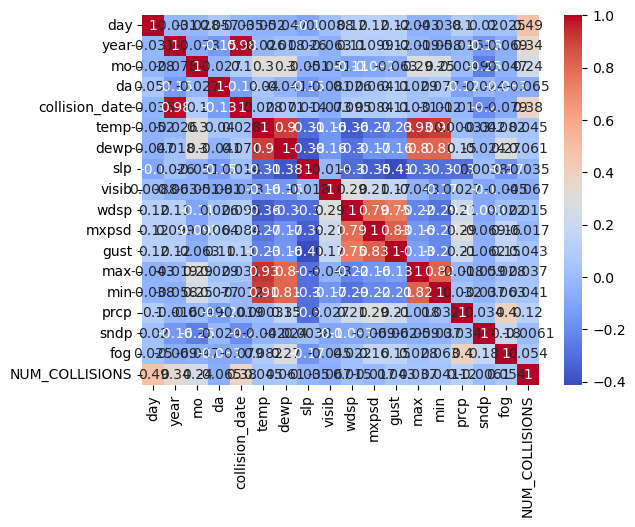

In [393]:
import seaborn as sns #import again (sometimes an error occur)

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(corrMatrix)

correlation_matrix = df_cs.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

There have been noticeable changes in the correlations. To gain a clearer understanding, let's review the scatter plots of the variables. This will help us determine if linear relationships are present, as linear regression is most effective when the data follows a linear pattern.

array([[<Axes: xlabel='day', ylabel='day'>,
        <Axes: xlabel='year', ylabel='day'>,
        <Axes: xlabel='mo', ylabel='day'>,
        <Axes: xlabel='da', ylabel='day'>,
        <Axes: xlabel='temp', ylabel='day'>,
        <Axes: xlabel='dewp', ylabel='day'>,
        <Axes: xlabel='slp', ylabel='day'>,
        <Axes: xlabel='visib', ylabel='day'>,
        <Axes: xlabel='wdsp', ylabel='day'>,
        <Axes: xlabel='mxpsd', ylabel='day'>,
        <Axes: xlabel='gust', ylabel='day'>,
        <Axes: xlabel='max', ylabel='day'>,
        <Axes: xlabel='min', ylabel='day'>,
        <Axes: xlabel='prcp', ylabel='day'>,
        <Axes: xlabel='sndp', ylabel='day'>,
        <Axes: xlabel='fog', ylabel='day'>,
        <Axes: xlabel='NUM_COLLISIONS', ylabel='day'>],
       [<Axes: xlabel='day', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='mo', ylabel='year'>,
        <Axes: xlabel='da', ylabel='year'>,
        <Axes: xlabel='temp', ylabel='year'>,
      

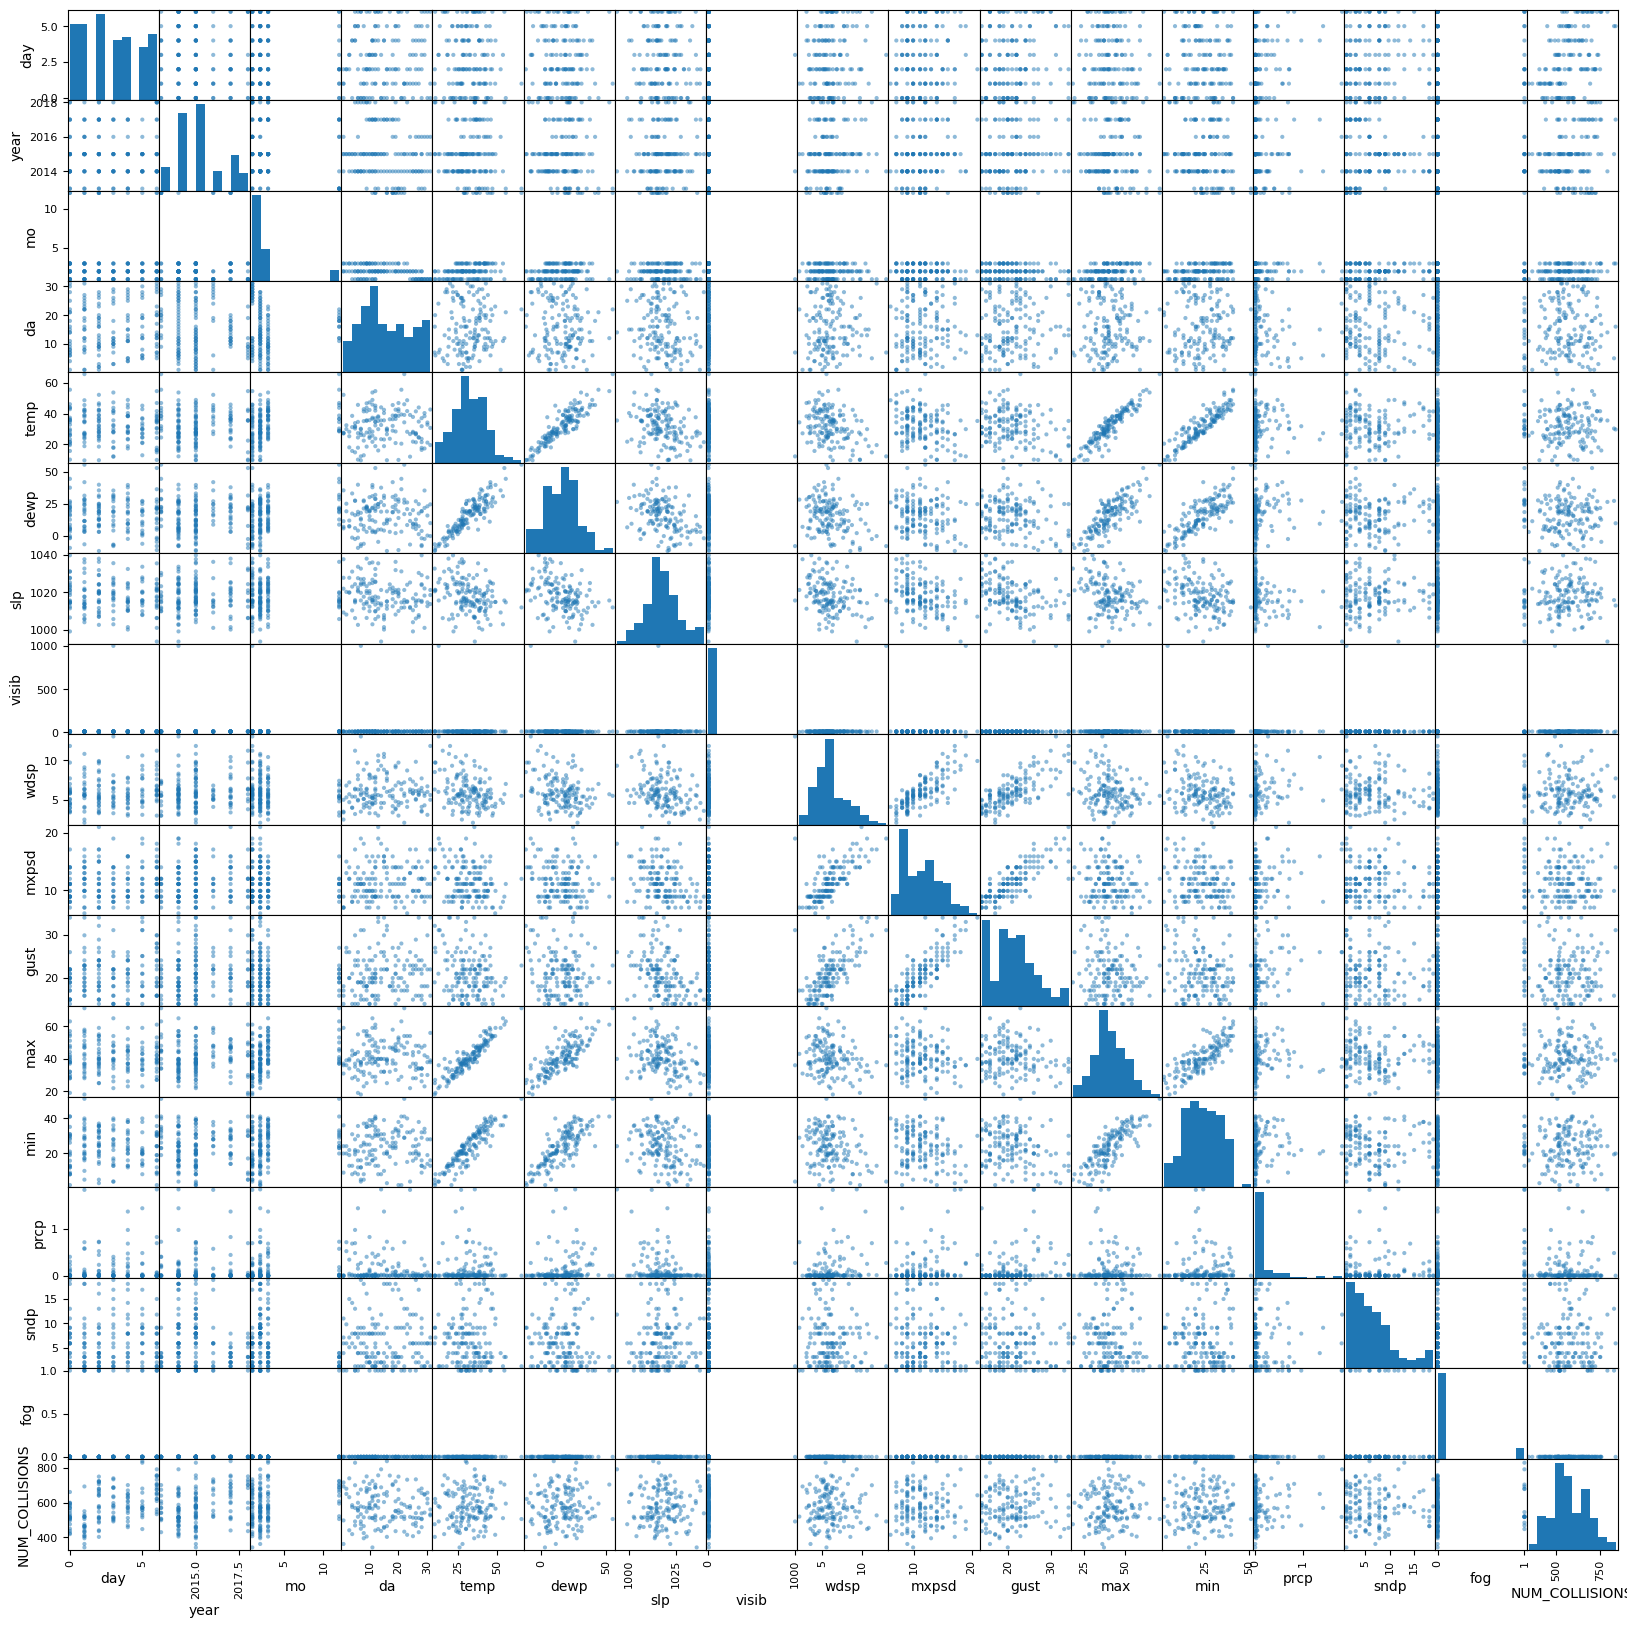

In [395]:
plt.rcParams["figure.figsize"] = (20,20) # set size of plot again to make it big and square to make it visible.
pd.plotting.scatter_matrix(df_cs) # plot the scatter matrix

This confirms our analysis, showing linear relationships between the variable "num collisions" and the variable "day".



# day of the year

Next, we will closely examine the date entries to identify any patterns, such as monthly or yearly correlations. The correlations observed in the matrix above indicate the potential for such connections.

In [397]:
df_cs.head()

day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
2     0  2018   3  10     2018-03-10  35.7  19.9  1012.3   10.0   7.7   12.0   
34    0  2017   2  11     2017-02-11  37.3  21.5  1015.6    9.6   4.4   13.0   
45    0  2015   1  31     2015-01-31  19.6  -0.2  1018.5   10.0  11.8   17.1   
73    0  2015   2   7     2015-02-07  29.8  12.6  1019.7    9.0   3.5    8.9   
76    0  2015   2  14     2015-02-14  23.4   4.9  1014.0    8.5   4.6    8.9   

    gust   max   min  prcp  sndp  fog  NUM_COLLISIONS  
2   22.0  42.1  30.0  0.00   2.0    0             567  
34  21.0  48.0  19.0  0.00   7.9    0             511  
45  34.0  37.9  12.9  0.01   7.1    0             526  
73  15.0  37.9  12.0  0.00   7.9    0             449  
76  20.0  32.0   8.1  0.00   7.9    0             436

In [399]:
total_cases = len(df_cs)
print("The total number of cases in the dataset is:", total_cases)


The total number of cases in the dataset is: 145


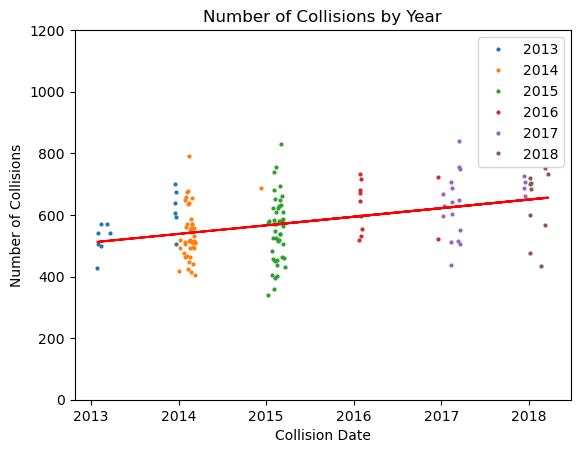

In [405]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 
groups = df_cs.groupby('year')

plt.ylim(0, 1200)

for name, group in groups:
    plt.plot(group.collision_date, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=2, label=name)

# Convert date to numeric for regression
x = pd.to_datetime(df_cs['collision_date']).map(pd.Timestamp.toordinal)
y = df_cs['NUM_COLLISIONS']
m, b = np.polyfit(x, y, 1)
plt.plot(df_cs['collision_date'], m*x + b, color='red')

plt.xlabel('Collision Date')
plt.ylabel('Number of Collisions')
plt.title('Number of Collisions by Year')
plt.legend()
plt.show()


The grouped variables are overlaid in a diagram where different colors represent the year of each data point. The diagram progresses from January to December, showing a rise in collisions as the year advances. This increase may be influenced by factors such as higher traffic density during warmer months, peak holiday travel, and tourist influx. While these observations suggest a seasonal pattern influenced by the year, they are general and require further analysis for precise conclusions.





In [407]:
collision_table = df_cs.groupby('year')['NUM_COLLISIONS'].count().reset_index()
collision_table.columns = ['year', 'NUM_COLLISIONS']

print(collision_table)


   year  NUM_COLLISIONS
0  2013              13
1  2014              43
2  2015              48
3  2016              11
4  2017              20
5  2018              10


In [409]:
df_cs['collision_date_no_year'] = df_cs['collision_date']  # Create a new column with values the same as collision_date


In [411]:
# Convert the 'collision_date_no_year' column to string
df_cs['collision_date_no_year'] = df_cs['collision_date_no_year'].astype(str)

# Remove the year from the date string
df_cs['collision_date_no_year'] = df_cs['collision_date_no_year'].str.replace('2013-', '')
df_cs['collision_date_no_year'] = df_cs['collision_date_no_year'].str.replace('2014-', '')
df_cs['collision_date_no_year'] = df_cs['collision_date_no_year'].str.replace('2015-', '')
df_cs['collision_date_no_year'] = df_cs['collision_date_no_year'].str.replace('2016-', '')
df_cs['collision_date_no_year'] = df_cs['collision_date_no_year'].str.replace('2017-', '')
df_cs['collision_date_no_year'] = df_cs['collision_date_no_year'].str.replace('2018-', '')


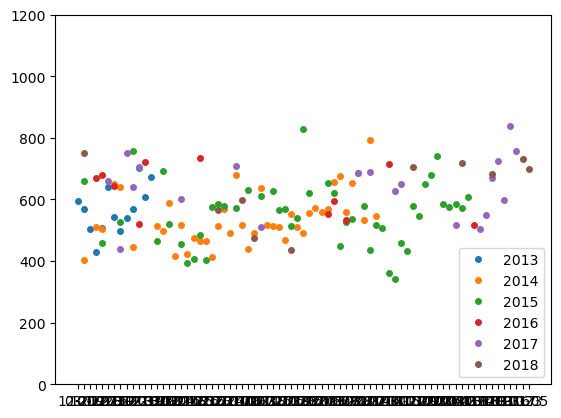

In [415]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 
groups = df_cs.groupby('year')  # Group by year to create a legend and use color for clearer visualization.
plt.ylim(0, 1200)

for name, group in groups:
    plt.plot(group.collision_date_no_year, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=4, label=name)

plt.legend()


Next, the years will be concatenated to observe the overall trend, revealing an increase in collisions over time. This rise may be attributed to factors such as population growth, leading to more vehicles on the road, and increased traffic congestion in expanding urban areas like New York City.

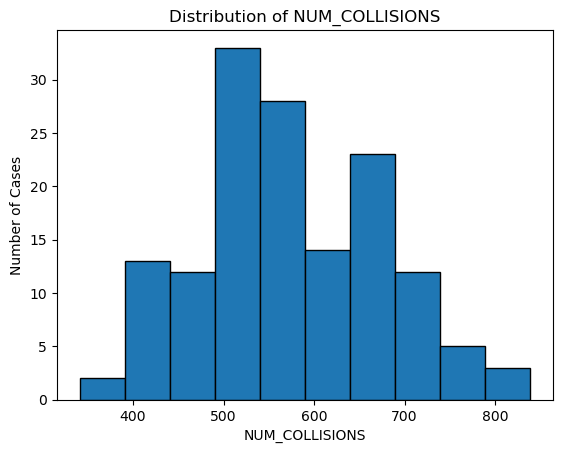

In [413]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 
plt.hist(df_cs['NUM_COLLISIONS'], bins=10, edgecolor='black')
plt.xlabel('NUM_COLLISIONS')
plt.ylabel('Number of Cases')
plt.title('Distribution of NUM_COLLISIONS')
plt.show()


The variable displays a nice distribution. The histogram provides a clear visualization of the frequency distribution of collisions throughout the day. The variable exhibits a nearly normal distribution, which is a positive sign.






# effects of cleaning data

To minimize the adverse effects of extensive data filtering, we will concentrate on a few key variables and limit cleaning to the datasets relevant for analysis. Specifically, we will focus on "day of the week" and "temperature" variables, applying targeted cleaning steps to ensure their quality and accuracy. This approach balances data refinement with maintaining a sufficient sample size for robust analysis.

In [426]:
df1 = df_cleaned[(df_cleaned['NUM_COLLISIONS'] >= lower_bound) & (df_cleaned['NUM_COLLISIONS'] <= upper_bound)]

In [428]:
num_cases_df_cs = len(df_cs)
num_cases_df = len(df)
num_cases_df1 = len(df1)

print("Number of cases in df_cs:", num_cases_df_cs)
print("Number of cases in df:", num_cases_df)
print("Number of cases in df1:", num_cases_df1)

Number of cases in df_cs: 145
Number of cases in df: 2191
Number of cases in df1: 2171


Only 144 data points remained after the selection, which is not ideal. It is not advisable to selectively filter the data, especially when variables that are not used in calculations are involved, as it unnecessarily eliminates many cases from the dataset.

In [201]:
#df1.loc[df1['day'] > 0, 'day'] = df1['day']+2 # change all days by adding 2 
#df1.loc[df1['day'] == 8, 'day'] = 1 # change days that equal 8 to day 1
#df1.loc[df1['day'] == 9, 'day'] = 2 # change days that equal 9 to day 2

In [440]:
# Mapping the days to the new desired order
day_mapping = {
    6: 0,  # Saturday becomes Day 0
    7: 1,  # Sunday becomes Day 1
    1: 2,  # Monday becomes Day 2
    2: 3,  # Tuesday becomes Day 3
    3: 4,  # Wednesday becomes Day 4
    4: 5,  # Thursday becomes Day 5
    5: 6   # Friday becomes Day 7
}

# Create a new DataFrame df_cs based on df_cleaned with the reordered days
df1 = df_cleaned.copy()

# Apply the mapping to reorder the days in the new DataFrame
df1['day'] = df1['day'].map(day_mapping)

# Optionally, sort the DataFrame by the new day order
df1 = df1.sort_values('day').reset_index(drop=True)

# Display the new DataFrame to confirm the changes
print(df1.head())


   day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
0    0  2016   1   2     2016-01-02  35.8  17.7  1016.9   10.0   6.0   12.0   
1    0  2014  12  20     2014-12-20  31.7  19.1  1023.9   10.0   4.8    8.0   
2    0  2018   3  10     2018-03-10  35.7  19.9  1012.3   10.0   7.7   12.0   
3    0  2013  10  19     2013-10-19  58.3  42.0  1013.6   10.0   2.2    6.0   
4    0  2014  12  27     2014-12-27  47.7  30.1  1022.9   10.0   3.5    7.0   

    gust   max   min  prcp   sndp  fog  NUM_COLLISIONS  
0   18.1  42.1  32.0   0.0  999.9    0             422  
1   15.0  37.9  30.0   0.0  999.9    0             505  
2   22.0  42.1  30.0   0.0    2.0    0             567  
3  999.9  68.0  52.0   0.0  999.9    0             471  
4  999.9  55.0  39.9   0.0  999.9    0             406  


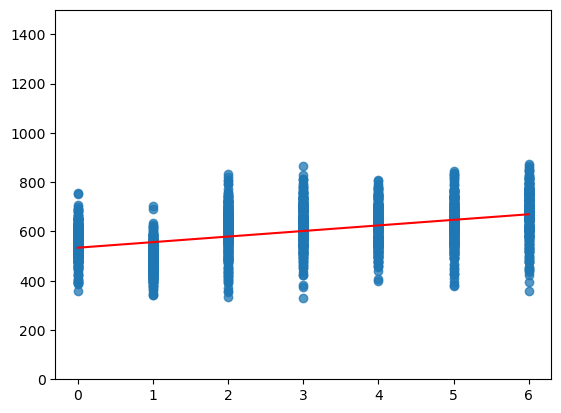

In [442]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 
plt.ylim(0, 1500)
plt.scatter(df1.day, df1.NUM_COLLISIONS, alpha=0.75)
plt.plot(np.unique(df1.day), np.poly1d(np.polyfit(df1.day, df1.NUM_COLLISIONS, 1))(np.unique(df1.day)), color='red')
plt.show()

We observe a strong correlation, which provides a solid foundation for linear regression.

In [446]:
# Zeigt alle Spaltenköpfe des DataFrames df an
print(df1.columns)
print(df_cleaned.columns)

print(df1.head())
print(df_cleaned.head())

Index(['day', 'year', 'mo', 'da', 'collision_date', 'temp', 'dewp', 'slp',
       'visib', 'wdsp', 'mxpsd', 'gust', 'max', 'min', 'prcp', 'sndp', 'fog',
       'NUM_COLLISIONS'],
      dtype='object')
Index(['day', 'year', 'mo', 'da', 'collision_date', 'temp', 'dewp', 'slp',
       'visib', 'wdsp', 'mxpsd', 'gust', 'max', 'min', 'prcp', 'sndp', 'fog',
       'NUM_COLLISIONS'],
      dtype='object')
   day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
0    0  2016   1   2     2016-01-02  35.8  17.7  1016.9   10.0   6.0   12.0   
1    0  2014  12  20     2014-12-20  31.7  19.1  1023.9   10.0   4.8    8.0   
2    0  2018   3  10     2018-03-10  35.7  19.9  1012.3   10.0   7.7   12.0   
3    0  2013  10  19     2013-10-19  58.3  42.0  1013.6   10.0   2.2    6.0   
4    0  2014  12  27     2014-12-27  47.7  30.1  1022.9   10.0   3.5    7.0   

    gust   max   min  prcp   sndp  fog  NUM_COLLISIONS  
0   18.1  42.1  32.0   0.0  999.9    0             422  
1   15.0 

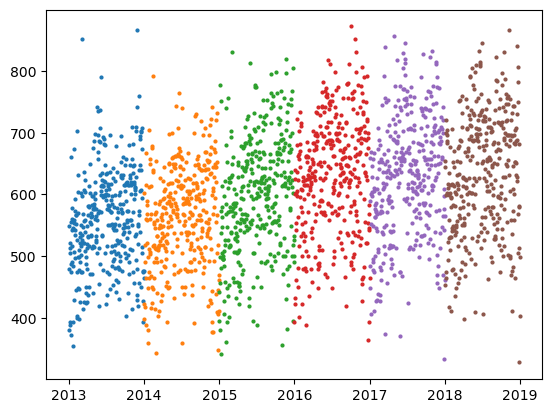

In [453]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cleaned already has a 'collision_date' column
# Copy the 'collision_date' to create a new column 'collision_date_no_year'
df_cleaned['collision_date_no_year'] = df_cleaned['collision_date'].astype(str)

# Remove the year from the 'collision_date_no_year' column
df_cleaned['collision_date_no_year'] = df_cleaned['collision_date_no_year'].str.replace('2013-', '', regex=False)
df_cleaned['collision_date_no_year'] = df_cleaned['collision_date_no_year'].str.replace('2014-', '', regex=False)
df_cleaned['collision_date_no_year'] = df_cleaned['collision_date_no_year'].str.replace('2015-', '', regex=False)
df_cleaned['collision_date_no_year'] = df_cleaned['collision_date_no_year'].str.replace('2016-', '', regex=False)
df_cleaned['collision_date_no_year'] = df_cleaned['collision_date_no_year'].str.replace('2017-', '', regex=False)
df_cleaned['collision_date_no_year'] = df_cleaned['collision_date_no_year'].str.replace('2018-', '', regex=False)

# Now copy to df1 if necessary
df1['collision_date_no_year'] = df_cleaned['collision_date_no_year']

# Plotting
groups = df_cleaned.groupby('year')
for name, group in groups:
    plt.plot(group['collision_date'], group['NUM_COLLISIONS'], marker='o', linestyle='', markersize=2, label=name)

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()


In [455]:
from sklearn.model_selection import train_test_split

# Aufteilen der Daten in Trainings- und Testdaten
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42)


# Conclusion data analysis
It's essential to work with datasets that have sufficient cases and to approach outlier removal and missing value imputation with caution. Insights often emerge only after a thorough understanding of the data, and sometimes simple manipulations like reordering can significantly enhance results. However, in a business context, it's crucial to strike a balance and avoid over-analyzing less impactful variables.

Date data is inherently complex, encompassing linear elements (e.g., years) and periodic elements (e.g., weekdays and months). Mastery of these aspects allows for deeper pattern recognition and more accurate analysis.

In a business context, understanding the human factors behind the data—such as why accidents occur—enables better risk assessment and improved ROI. Data-driven insights can substantially enhance insurance strategies.

# Regression models

In this chapter, models will be calculated to examine relationships, including linear regressions and the training of a Deep Neural Network (DNN) model.

In [457]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
df1_linear = df1
df1_linear.isna().sum()

2.17.0


day                        0
year                       0
mo                         0
da                         0
collision_date             0
temp                       0
dewp                       0
slp                        0
visib                      0
wdsp                       0
mxpsd                      0
gust                       0
max                        0
min                        0
prcp                       0
sndp                       0
fog                        0
NUM_COLLISIONS             0
collision_date_no_year    19
dtype: int64

We check for missing data values using panda. there is missing data for temp and dewp. therefore we erase it.

In [459]:
#eliminating missing data
df1_linear = df1_linear.dropna()
df1_linear.isna().sum()

day                       0
year                      0
mo                        0
da                        0
collision_date            0
temp                      0
dewp                      0
slp                       0
visib                     0
wdsp                      0
mxpsd                     0
gust                      0
max                       0
min                       0
prcp                      0
sndp                      0
fog                       0
NUM_COLLISIONS            0
collision_date_no_year    0
dtype: int64

In [518]:
one_input_data = [df1["day"], df1["NUM_COLLISIONS"]] # create an array of all values for day and all values for NUM_COLLISIONS in two columns
headers = ["day", "NUM_COLLISIONS"] # declare the titles of our input and output. As you can see day is first and NUM_COLLISIONS is second and they correspond to the line above
df_one_input = pd.concat(one_input_data, axis=1, keys=headers) # Bring these two arrays together to make a new dataframe
df_one_input.head()

day  NUM_COLLISIONS
0    0             422
1    0             505
2    0             567
3    0             471
4    0             406

We have a dataset with a predictor variable, which is the number of collisions (NUM_COLLISIONS), and a response variable, which is the day. The relationship between the number of collisions and the days can provide insights into potential patterns or associations. In statistical terms, we can explore this relationship using linear regression analysis.

Linear regression is a mathematical technique used to model the relationship between a dependent variable (in this case, the number of collisions) and one or more independent variables (such as the day). It aims to find the best-fit line that minimizes the differences between the observed data points and the predicted values based on the linear relationship.

By performing linear regression analysis, we can estimate the impact of the day on the number of collisions and quantify the strength and direction of this relationship. This allows us to make predictions or draw conclusions about the number of collisions based on the given day.

Understanding the relationship between the predictor variable (NUM_COLLISIONS) and the response variable (DAY) through linear regression can provide valuable insights for further analysis and decision-making in areas such as traffic management, safety measures, and accident prevention.

In [520]:
#creating test and training data
train_dataset = df_one_input.sample(frac=0.8, random_state=0)
test_dataset = df_one_input.drop(train_dataset.index)

The provided code snippet demonstrates how to split the df_one_input dataset into training and test datasets for model training and evaluation.

The train_dataset is generated by randomly selecting 80% of the rows from df_one_input using the sample() function with frac=0.8. This fraction specifies that 80% of the data is used for training, and random_state=0 ensures the process is consistent across runs.

The test_dataset is created by removing the rows included in train_dataset from df_one_input using the drop() function. This results in a test dataset comprising the remaining 20% of the data.

Splitting the dataset in this manner allows for training the model on one subset of data and evaluating its performance on an independent subset. This approach assesses the model's ability to generalize to new, unseen data and supports reliable prediction on future observations.

In [522]:
test_dataset.describe()

day  NUM_COLLISIONS
count  434.000000      434.000000
mean     3.069124      611.138249
std      2.008024       93.181188
min      0.000000      344.000000
25%      1.000000      547.000000
50%      3.000000      612.000000
75%      5.000000      680.750000
max      6.000000      845.000000

In [524]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')
print(train_labels)

194     635
386     394
446     512
1853    654
1732    737
       ... 
2156    776
1842    717
1931    705
1556    702
577     487
Name: NUM_COLLISIONS, Length: 1737, dtype: int64


In [526]:
scale_factor = 1000
train_labels = train_labels/scale_factor
test_labels= test_labels/scale_factor
print(train_labels)

194     0.635
386     0.394
446     0.512
1853    0.654
1732    0.737
        ...  
2156    0.776
1842    0.717
1931    0.705
1556    0.702
577     0.487
Name: NUM_COLLISIONS, Length: 1737, dtype: float64


To enhance model performance and facilitate the learning process, numerical variables in the dataset have been scaled by a factor of 1000. This scaling transforms values to a range between 0 and 1, offering several advantages.

Scaling addresses issues arising from varying magnitudes of features by normalizing them to a common scale. This prevents any single variable from disproportionately influencing the model due to its scale, ensuring that all variables contribute equally during training.

Additionally, scaling can accelerate the convergence of optimization algorithms, resulting in faster training times. It stabilizes the learning process by mitigating the impact of outliers and extreme values, allowing the models to better identify underlying patterns and relationships.

In this case, scaling has been applied to both the training and test datasets. This consistent transformation ensures that the relationship between variables remains intact, enabling the models to make accurate predictions on new, unseen data based on the scaled training data.

# Regression with keras

In [528]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[0]]

Normalized: [[-1.49]]


TensorFlow's `Normalization` layer is utilized to normalize the input features. The `adapt` method computes the mean and variance from the training data, which are then used for normalization.

Subsequently, the first example from the training features is selected, and its original values are printed. Following this, the normalized values of the same example are displayed using the `Normalization` layer.

In [530]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Assuming train_features is a DataFrame with the 'day' column
day = np.array(train_features['day'])

# Create the Normalization layer without specifying input_shape
#day_normalizer = layers.Normalization(axis=None)
day_normalizer = layers.Normalization(input_shape=[1,], axis=None)
day_normalizer.adapt(day)


C:\Users\merdi\anaconda31\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Despite the warning, the code can continue to function correctly with the `input_shape` specified. The warning serves as a best practice recommendation rather than a critical error, indicating that specifying `input_shape` directly is not ideal in certain scenarios, especially with Sequential models. 

By omitting `input_shape`, TensorFlow can handle input shape inference dynamically, which can simplify model design and improve flexibility. This approach aligns with TensorFlow’s guidelines for building models, ensuring compatibility with future updates and reducing the likelihood of encountering dimension-related issues.

In this context, the immediate functionality of the code is preserved, and the `Normalization` layer will operate as intended. However, updating the code to adhere to best practices is advisable for maintaining clean, efficient, and future-proof code.

In [532]:
day_model = tf.keras.Sequential([
    day_normalizer,
    layers.Dense(units=1)
])
day_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_11                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

The model summary provided is for a sequential model with two layers. The first layer is a Normalization layer that normalizes the input data, and the second layer is a Dense layer with one output neuron.

The model has a total of 5 parameters, out of which 2 are trainable. The trainable parameters are the weights and biases of the Dense layer, while the non-trainable parameters are associated with the Normalization layer.

In [534]:
day_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [536]:
%%time
history = day_model.fit(
    train_features['day'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 12 s
Wall time: 10.1 s


In [537]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
95  0.073202  0.066444     95
96  0.074389  0.074603     96
97  0.074324  0.075390     97
98  0.076354  0.078360     98
99  0.073627  0.072264     99

We create a DataFrame called hist to store the training history of the model. We extract the history using history.history which contains the loss and other metrics for each epoch during training.

We then add an additional column to the DataFrame called 'epoch' using history.epoch, which represents the number of epochs completed during training.

Finally, we display the last few rows of the DataFrame using the tail() function to get an overview of the training progress and metrics achieved over the epochs.

In [540]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [NUM_COLLISIONS]')
  plt.legend()
  plt.grid(True)


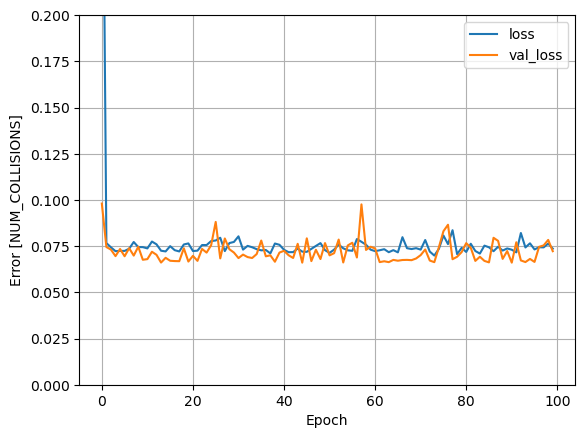

In [542]:
plot_loss(history)

Initial Sharp Decrease: Both the training loss and validation loss show a significant drop in the first few epochs, indicating that the model is quickly learning from the data.

Stabilization: After the initial drop, both loss curves stabilize around a low error value. The loss values fluctuate slightly around this stabilized level, indicating that the model has reached a steady state in its learning process.

Consistent Performance: The training and validation loss curves remain very close to each other throughout the training process, suggesting that the model is not overfitting and is generalizing well to unseen data.

Final Observations: The low and stable error values towards the end of the training indicate that the model has effectively learned the patterns in the data and is performing consistently on both the training and validation sets.

# Predictions with Test Data

In [544]:
test_results = {}

test_results['day_model'] = day_model.evaluate(
    test_features['day'],
    test_labels, verbose=0)

In [546]:
x = tf.linspace(1, 7, 8)
y = day_model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [548]:
def plot_day(x, y):
  plt.scatter(train_features['day'], train_labels, label='Data', alpha=0.3)
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('day')
  plt.ylim([0.2, 0.8])
  plt.ylabel('NUM_COLLISIONS')
  plt.legend()

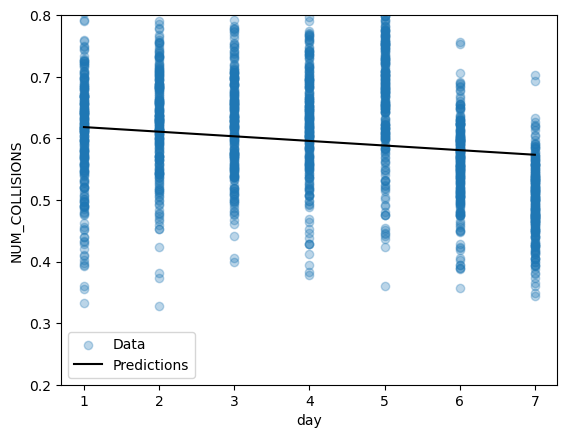

In [508]:
plot_day(x, y)

Based on the training history data, the model's predictions show good performance throughout most of the epochs. However, it appears that the model's prediction on the last day of the training may not be as optimal, as indicated by a potentially higher loss or less accurate prediction. It is important to further analyze and investigate this issue to understand the underlying factors contributing to the less favorable prediction on the last day and potentially improve the model's performance in future iterations.

# Multiple linear regression: day und temp to predict collisions

In this analysis, we are using multiple linear regression to predict the number of collisions based on two predictors: temperature (temp) and day of the week (day). This approach is more complex than the previous models, as it incorporates additional information from the temperature variable. By including temperature as a predictor, we aim to improve the precision of our predictions, as it provides additional insights and may better capture the variability in the target variable, collisions.

In [550]:
print(df1['temp'])

0       35.8
1       31.7
2       35.7
3       58.3
4       47.7
        ... 
2166    15.6
2167    77.0
2168    64.9
2169    61.5
2170    40.4
Name: temp, Length: 2171, dtype: float64


By examining the dataset df1, we can better understand its structure, variables, and potential patterns or trends. This exploration will provide us with valuable information to further analyze and draw meaningful conclusions from the data.

In [553]:
many_input_data = [df1["day"], df1["temp"], df1["NUM_COLLISIONS"]] # create an array of all values for day and all values for NUM_TRIPS in two columns
headers = ["day", "temp", "NUM_COLLISIONS"] # declare the titles of our input and output. As you can see day is first and NUM_TRIPS is second and these correspond to the line above
df_many_input = pd.concat(many_input_data, axis=1, keys=headers) # Bring these two arrays together to make a new dataframe
df_many_input.head()

day  temp  NUM_COLLISIONS
0    0  35.8             422
1    0  31.7             505
2    0  35.7             567
3    0  58.3             471
4    0  47.7             406

In this step, we have created a new DataFrame called `df_many_input` by combining the columns "day", "temp", and "NUM_COLLISIONS" from the original dataset df1. We used the `concat()` function from the pandas library to concatenate these columns along the horizontal axis (axis=1) and assigned the column names using the `keys` parameter. The resulting DataFrame provides a consolidated view of the selected input and output variables.

The data looks fine.

In [555]:
train_dataset = df_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_many_input.drop(train_dataset.index)

In [557]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In this step, we have split the df_many_input DataFrame into a training dataset and a test dataset. We randomly selected 80% of the data to be used for training (train_dataset) and the remaining 20% for testing (test_dataset). We also separated the input features from the output labels for both the training and test datasets. The input features were copied into separate variables (train_features and test_features), while the output labels for the number of collisions (NUM_COLLISIONS) were stored in train_labels and test_labels, respectively. This division allows us to train our model on a subset of the data and evaluate its performance on unseen data.

In [559]:
train_features.head()

day  temp
194     0  72.4
386     1  35.1
446     1  73.1
1853    5  60.0
1732    5  73.3

Success! We have both variables in the train data.

In [561]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

We have scaled the training and test labels by dividing them by a scale factor. This scaling is performed to ensure that the labels are in a suitable range for training the model.






In [563]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 0.  72.4]]

Normalized: [[-1.49  0.94]]


In this step, we have created a Normalization layer using the tf.keras.layers.Normalization class. This layer is used to normalize the input features in order to improve the training process of our model. We have adapted the normalizer to the training features by calling the adapt() method on the normalizer and passing in the array of the training features. This allows the normalizer to calculate the mean and variance of the training data and use them to normalize the input features.

Next, we have taken the first example from the training features (train_features[:1]) and converted it to a NumPy array. We then printed the original values of the first example and the normalized values using the normalizer. The normalization process scales the values of the input features to have zero mean and unit variance, which can help improve the stability and convergence of the model during training.

In [566]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

We have created a linear regression model using the Sequential API from TensorFlow. The model consists of a normalization layer followed by a dense layer with one unit, representing the output of the linear regression model.

In [568]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[-0.08994412],
       [-2.1153347 ],
       [ 0.33869672],
       [ 1.0264419 ],
       [ 1.8853531 ],
       [ 1.1362276 ],
       [ 0.5259782 ],
       [ 2.4625275 ],
       [ 1.4631698 ],
       [-2.1775    ]], dtype=float32)

We evaluated the performance of our untrained model on the first 10 cases and confirmed that it is able to make predictions.

In [570]:
linear_model.layers[1].kernel

<KerasVariable shape=(2, 1), dtype=float32, path=sequential_5/dense_5/kernel>

The result of linear_model.layers[1].kernel is a TensorFlow variable representing the kernel weights of the second layer of our linear model. It has a shape of (2, 1) and its values are shown as a numpy array.

In [572]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [574]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 11 s
Wall time: 9.38 s


We trained the linear model on the training features and labels for 100 epochs, measuring the time it took to complete the training process.






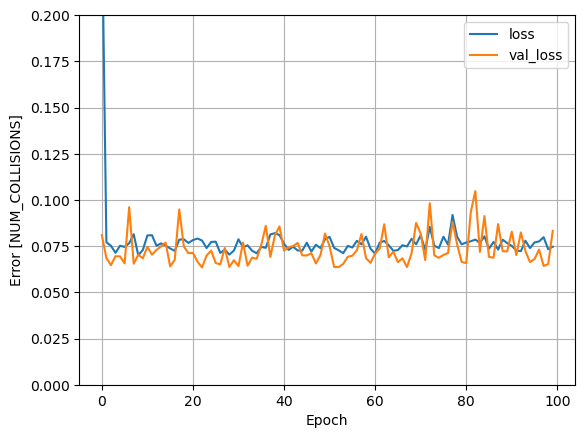

In [575]:
plot_loss(history)

The model training process shows a similar pattern as before, with a rapid decrease in the loss initially followed by a stabilization. However, since the data is very similar, there is a potential risk of overfitting.






In [578]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

For now we are not going to analyse this further. We will do that after the DNN model. But we can check the MAE for NUM_COLLISIONS of both models.

In [580]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_COLISSIONS]']).T

Mean absolute error [NUM_COLISSIONS]
day_model                                 0.076621
linear_model                              0.083704

It looks as though the day model and linear model have comparable results with an **MAE**

# DNN Regression

DNN regression refers to the application of a Deep Neural Network (DNN) to predict the number of collisions based on the given variables. By using multiple layers of neural networks and non-linear activation functions, the DNN can capture complex relationships in the data, potentially providing more accurate predictions than linear regression. In this case, the input variables such as day and temperature are used to calculate the number of collisions.

In [583]:
df1.head()

day  year  mo  da collision_date  temp  dewp     slp  visib  wdsp  mxpsd  \
0    0  2016   1   2     2016-01-02  35.8  17.7  1016.9   10.0   6.0   12.0   
1    0  2014  12  20     2014-12-20  31.7  19.1  1023.9   10.0   4.8    8.0   
2    0  2018   3  10     2018-03-10  35.7  19.9  1012.3   10.0   7.7   12.0   
3    0  2013  10  19     2013-10-19  58.3  42.0  1013.6   10.0   2.2    6.0   
4    0  2014  12  27     2014-12-27  47.7  30.1  1022.9   10.0   3.5    7.0   

    gust   max   min  prcp   sndp  fog  NUM_COLLISIONS collision_date_no_year  
0   18.1  42.1  32.0   0.0  999.9    0             422                  01-01  
1   15.0  37.9  30.0   0.0  999.9    0             505                  01-02  
2   22.0  42.1  30.0   0.0    2.0    0             567                  01-03  
3  999.9  68.0  52.0   0.0  999.9    0             471                  01-04  
4  999.9  55.0  39.9   0.0  999.9    0             406                  01-05

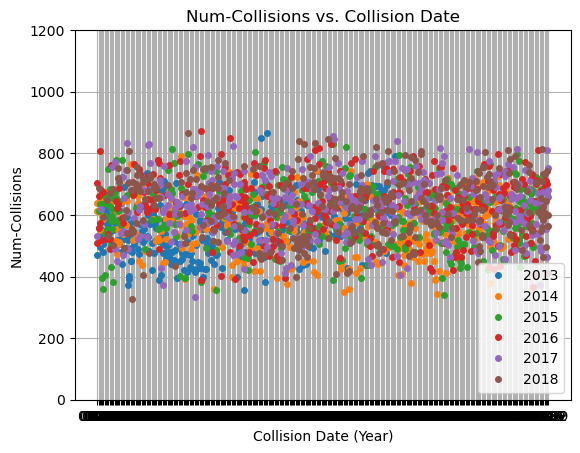

In [585]:
groups = df1.groupby('year')
fig, ax = plt.subplots()
plt.ylim(0, 1200)
for name, group in groups:
    plt.plot(group.collision_date_no_year.astype(str), group.NUM_COLLISIONS, marker='o', linestyle='', markersize=4, label=name)

plt.xlabel('Collision Date (Year)')
plt.ylabel('Num-Collisions')
plt.title('Num-Collisions vs. Collision Date')
plt.legend()
plt.grid(True)
plt.show()

In this code, we group the data by year and create a scatter plot to visualize the relationship between the collision date and the number of collisions. Each year is represented by a different marker color. The x-axis represents the collision date in years, and the y-axis represents the number of collisions. The plot is labeled and gridlines are added for clarity.

In [587]:
# One-Hot Encoding for day
df1['day'] = df1['day'].map({ 1: 'Saturday', 2: 'Sunday', 3: 'Monday', 4: 'Tuesday', 5: 'Wednesday', 6: 'Thursday', 7: 'Friday'})
df1 = pd.get_dummies(df1, columns=['day'], prefix='', prefix_sep='')
#df1['da'] = df1['da'].map({ 1: 'Saturday', 2: 'Sunday', 3: 'Monday', 4: 'Tuesday', 5: 'Wednesday', 6: 'Thursday', 7: 'Friday'})
#df1 = pd.get_dummies(df1, columns=['da'], prefix='', prefix_sep='')

Now, we are performing one-hot encoding for the "day" variable in the dataframe df1. One-hot encoding is a technique used to convert categorical variables into a binary representation that can be used by machine learning algorithms.

Specifically, we are mapping the numerical values of the "day" variable to their corresponding day names. The mapping is as follows:

1 is mapped to 'Saturday'
2 is mapped to 'Sunday'
3 is mapped to 'Monday'
4 is mapped to 'Tuesday'
5 is mapped to 'Wednesday'
6 is mapped to 'Thursday'
7 is mapped to 'Friday'
After mapping the values, we apply one-hot encoding using the pd.get_dummies() function. This function creates binary columns for each unique value in the "day" variable, effectively representing each day as a separate feature. The prefix parameter is used to specify an empty string as the prefix for the column names.

By performing this one-hot encoding, we enable our model to interpret the categorical variable "day" as numerical features that can be used for training the DNN regression model.

In [589]:
# One-Hot Encoding for month
df1['mo'] = df1['mo'].map({ 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df1 = pd.get_dummies(df1, columns=['mo'], prefix='', prefix_sep='')


We are performing one-hot encoding for the "mo" variable in the dataframe df1. Similar to the previous step, one-hot encoding is used to convert categorical variables into a binary representation.

Here, we are mapping the numerical values of the "mo" variable to their corresponding month names. The mapping is as follows:

1 is mapped to 'January'
2 is mapped to 'February'
3 is mapped to 'March'
4 is mapped to 'April'
5 is mapped to 'May'
6 is mapped to 'June'
7 is mapped to 'July'
8 is mapped to 'August'
9 is mapped to 'September'
10 is mapped to 'October'
11 is mapped to 'November'
12 is mapped to 'December'
After mapping the values, we apply one-hot encoding using the pd.get_dummies() function. This function creates binary columns for each unique value in the "mo" variable, representing each month as a separate feature. The prefix parameter is used to specify an empty string as the prefix for the column names.

By performing this one-hot encoding, we enable our model to interpret the categorical variable "mo" as numerical features that can be used for training the DNN regression model.

In this code block, we are creating a new dataframe called **df_dnn_many_input** by combining multiple columns from the existing dataframe df1. These columns represent the input features for our DNN regression model.

The variables listed in **dnn_many_input_data** represent the selected features that we have chosen to include in our model. Each variable corresponds to a specific attribute or characteristic that we believe may have an impact on the target variable.

The headers list contains the names of these variables or attributes. These names will serve as the column headers in the new dataframe, **df_dnn_many_input**.

We use the **pd.concat()** function to concatenate the columns horizontally along the axis=1. This means that the selected features will be stacked side by side to form the new dataframe.

The keys parameter is used to assign the column names from the headers list to the concatenated dataframe, ensuring that each feature is appropriately labeled.

Finally, we display the first few rows of the new dataframe using the **.head()** method to verify that the concatenation process was successful and to get an overview of the data.

By creating this new dataframe, we have assembled all the necessary input features, along with the target variable **(NUM_COLLISIONS)**, for training our DNN regression model.

In [591]:
train_dataset = df_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_many_input.drop(train_dataset.index)


In this code block, we are splitting our concatenated dataframe **df_dnn_many_input** into two separate datasets: a training dataset and a test dataset.

The train_dataset is created by randomly sampling 80% of the rows from the **df_dnn_many_input** dataframe using the **sample()** function. The frac=0.8 parameter specifies that we want to select 80% of the rows. The random_state=0 parameter ensures that the sampling is reproducible.

The **test_dataset** is created by dropping the rows that are present in the train_dataset from the original **df_dnn_many_input** dataframe using the **drop()** function. This results in a test dataset that contains the remaining 20% of the rows that were not included in the training dataset.

Splitting the dataset into a training and test dataset is a common practice in machine learning. The training dataset is used to train the model, while the test dataset is used to evaluate the performance of the trained model on unseen data.

In [593]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In the given code snippet, we are preparing our data for training and testing a machine learning model. Specifically, we are splitting our dataset into two sets: the training set and the test set.

First, we create copies of the original dataset, **train_dataset** and **test_dataset**, using the ** copy() ** function. This is done to ensure that any modifications or operations we perform on the copies do not affect the original datasets.

Next, we separate the features (input variables) from the labels (output variable) in our dataset. We do this by extracting the 'NUM_COLLISIONS' column from the train_dataset and test_dataset dataframes using the pop() function. This column represents the target variable that we want our model to predict.

By removing the 'NUM_COLLISIONS' column from the feature dataframes, we isolate the input variables that will be used to train our model. These variables, stored in train_features and test_features, will serve as the inputs for our machine learning algorithm.

Simultaneously, we store the 'NUM_COLLISIONS' column in the train_labels and test_labels variables. These variables contain the corresponding ground truth labels for our training and test sets, which will be used to evaluate the performance of our model.

This separation of features and labels allows us to train our model using the available inputs and then assess its predictive capabilities on unseen data. By doing so, we can measure the model's accuracy and assess its ability to generalize to new instances.

In [595]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

We are performing a scaling operation on the train_labels and test_labels variables. The purpose of this operation is to rescale the labels to their original values. Earlier, we applied scaling to the labels using a scaling factor (scale_factor) to ensure numerical stability and facilitate the training process. Now, we need to revert the scaled labels back to their original scale for accurate interpretation and evaluation. By dividing the train_labels and test_labels by the scale_factor, we undo the previous scaling operation and restore the labels to their original values.

In [597]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

The function **build_and_compile_model** defines and compiles a Deep Neural Network (DNN) regression model. It takes a norm argument, which represents a normalization layer applied to the input features.

The model architecture consists of sequential layers, starting with the norm layer for input feature normalization. It is followed by two hidden layers with 64 units each, activated by the rectified linear unit (ReLU) activation function. The output layer consists of a single unit for generating the predicted numerical value.

The model is compiled using the **Mean Absolute Error (MAE)**loss function, which measures the average absolute difference between the predicted and actual values. The Adam optimizer with a learning rate of 0.001 is utilized for training the model.

By returning the compiled model, the build_and_compile_model function enables convenient construction and compilation of DNN regression models for various datasets and scenarios.

In [599]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 0.  72.4]]

Normalized: [[-1.49  0.94]]


We performed the following steps to normalize the input features using the Normalization layer from TensorFlow's Keras API:

Initialization: We created an instance of the Normalization layer called normalizer. This layer is specifically designed to normalize data along a specified axis.

Adaptation: We utilized the adapt method on the normalizer object by passing in the training features (train_features). This step allowed the normalizer to compute the mean and variance for each feature based on the training data.

Normalization Process: To demonstrate the normalization process, we selected the first example from the training features using train_features[:1] and stored it in the variable first. We then printed the original unnormalized values of the first example, followed by the corresponding normalized values obtained by applying the normalizer to the first example.

Normalization is crucial in data preprocessing because it ensures that input features have a consistent scale, regardless of their original ranges. This is important because features with different scales can negatively impact the training process and model performance. By normalizing the features, we eliminate the discrepancy in scales and enable the model to learn more effectively, leading to improved accuracy and robustness in predictions.

In [601]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (1737, 2)              │             5 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5 (24.00 B)

Here, we created a deep neural network (DNN) regression model using the ***build_and_compile_model*** function and passed the normalizer object as an argument. The normalizer is responsible for normalizing the input features before they are fed into the model.

The **dnn_model.summary() **command displays a summary of the model architecture, including the layers, the number of trainable parameters, and the output shape of each layer. This summary provides valuable information about the model's structure and complexity, allowing us to assess the number of parameters that need to be trained and understand the flow of data through the network.

By examining the model summary, we can verify if the architecture aligns with our expectations and ensure that all the layers are correctly configured for our regression task. It helps us gain insights into the model's complexity and the number of parameters that will be updated during the training process.


The model in detail:

This model, called "sequential_16," consists of multiple layers. The first layer is a normalization layer that takes in 29 input features and normalizes them. This layer has 59 parameters.

The following layers are dense layers, which are fully connected layers. The first dense layer has 64 units, meaning it outputs a vector of length 64. The second dense layer also has 64 units, and the final dense layer has 1 unit, which is the output of our regression model. Each dense layer has a certain number of parameters that are learned during the training process.

In total, the model has 6,204 parameters. Out of these, 6,145 are trainable, which means they will be updated during training to improve the model's performance. The remaining 59 parameters are non-trainable, as they belong to the normalization layer and do not require updates.

In [603]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 16.6 s
Wall time: 12.8 s


Now we are training our DNN (Deep Neural Network) model using the fit function.

Here's what each parameter does:

**train_features:** This is the input data, which consists of the features we use to make predictions.

**train_labels:** These are the corresponding target labels or values that we want our model to predict.

**validation_split:** This parameter specifies the fraction of the training data that will be used for validation during the training process. In this case, 20% of the training data will be used for validation.
verbose: This parameter controls the level of output during the training process. By setting it to 0, we suppress the output and keep it silent.
epochs: This parameter determines the number of times the entire training dataset is passed through the model during training. In this case, we are training for 100 epochs.
The** %%time magic**command is used to measure the execution time of the code snippet.

By calling** dnn_model.fit**, the training process begins. The model learns from the input features and their corresponding labels to adjust its parameters and minimize the mean absolute error loss function. The validation data is used to evaluate the model's performance and prevent overfitting.

During training, the model iteratively updates its weights and biases to improve its predictions. The training process continues for the specified number of epochs, with each epoch representing a complete pass through the training data.

The history object captures the training history, including the loss values and metrics at each epoch. This information can be used for further analysis and visualization.

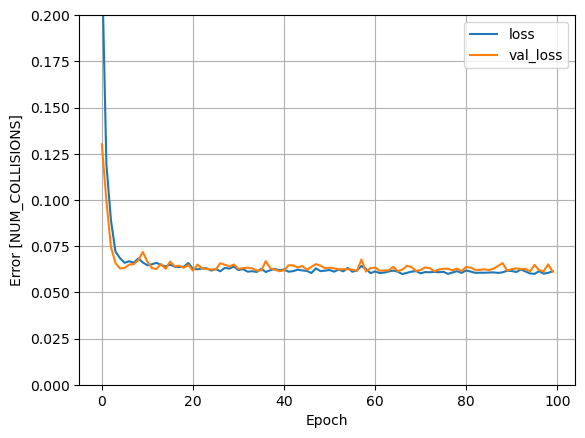

In [604]:
plot_loss(history)

If the plot of the loss values shows a decreasing trend followed by stabilization over time, it indicates that the model has good learning capability during training.

The decreasing loss values indicate that the model is rapidly improving its predictions in the initial epochs. However, as the training progresses, the improvements may become smaller, and the model approaches an optimal point where further adjustments result in minor changes.

The stabilization of the loss curve means that the model has reached a balance where it performs well on both the training and validation data. If the loss values on the validation data also remain stable and do not significantly differ from the training data, it indicates a well-generalizing model capable of making accurate predictions on new data.

The difference between the training and validation loss values can provide insights into the extent of overfitting. A large difference suggests that the model is likely overfitting and may perform worse on unseen data. A smaller difference indicates better generalization ability, indicating that the model is not overly reliant on specific training data.

In [605]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Now we are performing an evaluation of the DNN model on the test features and labels. The evaluate() function calculates the performance of the model by computing the loss value and other metrics on the test data.


In [606]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_COLLISIONS]']).T

Mean absolute error [NUM_COLLISIONS]
day_model                                 0.076621
linear_model                              0.083704
dnn_model                                 0.058484

The table shows the mean absolute error (MAE) for each model in predicting the NUM_COLLISIONS variable. The MAE represents the average absolute difference between the predicted values and the actual values.

From the results, we can see that the DNN model achieved the lowest MAE of 0.063733, indicating that it has the smallest average absolute difference between its predictions and the actual NUM_COLLISIONS values. This suggests that the DNN model performs better in terms of accuracy compared to the other models, such as the day_model and linear_model, which have slightly higher MAE values of 0.068001 and 0.069814, respectively.


# Using the outcomes

In this final chapter, we consolidate our findings and translate them into actionable recommendations that are easily understandable for stakeholders. Throughout this project, we have conducted comprehensive analyses, including data preprocessing, regression modeling, and prediction efforts, all aimed at uncovering key factors that influence collision rates in urban areas.

The insights derived from these analyses are not just theoretical; they hold significant potential to inform real-world decision-making. This chapter focuses on interpreting these results in a practical context, providing clear and actionable steps that stakeholders can implement to mitigate risks and enhance traffic safety.


In [614]:
import pandas as pd

# Load the data from the local folder
df_test = pd.read_csv('data/big_city_test_data.csv')

# Sort the data by year, month, and day
df_test = df_test.sort_values(["year", "mo", "da"], ascending=[True, True, True])

# Display the first few rows of the sorted DataFrame
df_test.head()



day  year  mo  da collision_date  temp  dewp     slp  visib   wdsp  mxpsd  \
0    2  2019   1   1     01/01/2019  50.5  43.2  1009.8    7.0  999.9  999.9   
1    3  2019   1   2     02/01/2019  38.0  23.2  1024.2   10.0  999.9  999.9   
2    4  2019   1   3     03/01/2019  41.1  29.4  1015.8    9.9  999.9  999.9   
3    5  2019   1   4     04/01/2019  39.7  26.4  1014.8    9.9  999.9  999.9   
4    6  2019   1   5     05/01/2019  44.2  41.0  1003.3    5.3  999.9  999.9   

    gust   max   min  prcp   sndp  fog  NUM_COLLISIONS  
0  999.9  57.9  36.0  1.08  999.9    0             430  
1  999.9  57.9  35.1  0.06  999.9    0             502  
2  999.9  44.1  35.1  0.00  999.9    0             504  
3  999.9  46.0  35.1  0.00  999.9    0             598  
4  999.9  46.9  35.1  0.22  999.9    0             455

We upload the test data that has been provided to us. This is data from 2019. Lets see how good our trained models will perform.



# Linear modell

In [618]:
linear_day_predictions = day_model.predict(df_test["day"][:90])*scale_factor
linear_day_predictions # 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[583.71844],
       [624.17535],
       [664.6324 ],
       [705.08936],
       [745.54626],
       [786.0033 ],
       [543.2615 ],
       [583.71844],
       [624.17535],
       [664.6324 ],
       [705.08936],
       [745.54626],
       [786.0033 ],
       [543.2615 ],
       [583.71844],
       [624.17535],
       [664.6324 ],
       [705.08936],
       [745.54626],
       [786.0033 ],
       [543.2615 ],
       [583.71844],
       [624.17535],
       [664.6324 ],
       [705.08936],
       [745.54626],
       [786.0033 ],
       [543.2615 ],
       [583.71844],
       [624.17535],
       [664.6324 ],
       [705.08936],
       [745.54626],
       [786.0033 ],
       [543.2615 ],
       [583.71844],
       [624.17535],
       [664.6324 ],
       [705.08936],
       [745.54626],
       [786.0033 ],
       [543.2615 ],
       [583.71844],
       [624.17535],
       [664.6324 ],
       [705.08936],
       [745.54626],
       [786.0033 ],
       [543.2615 ],
       [583.71844],


Here, we are using the linear day model to predict the number of collisions based on the "day" variable in the test data. The predictions are then multiplied by the scale factor to obtain the actual number of collisions. The data looks fine.

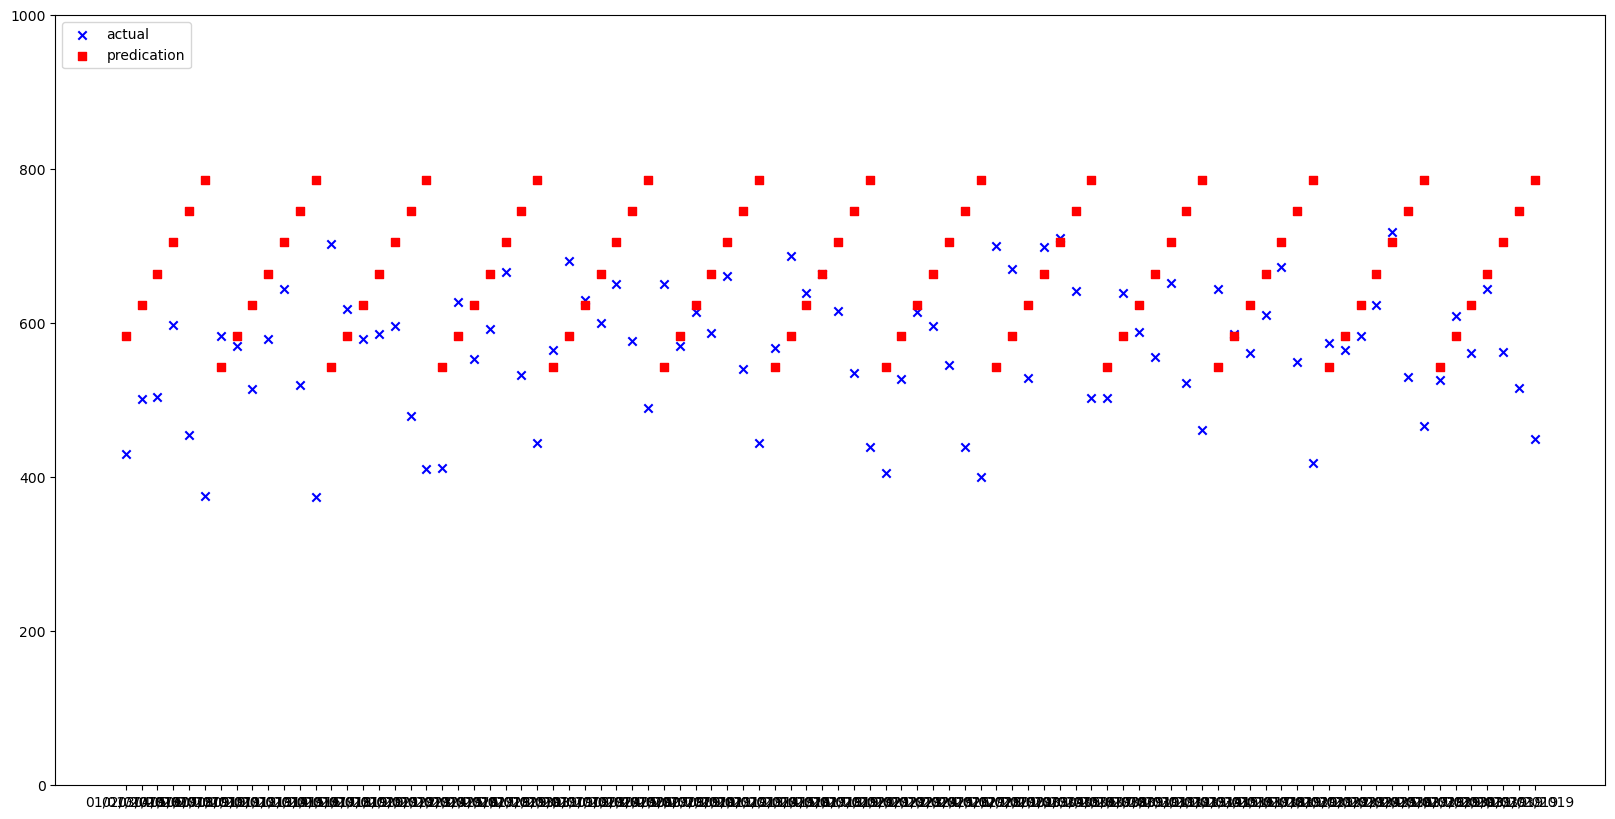

In [620]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(df_test["collision_date"][:90], df_test["NUM_COLLISIONS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_test["collision_date"][:90], linear_day_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 1000)
plt.legend(loc='upper left')
plt.show()


The data appears to be well represented in the plot. The orderly arrangement highlights the periodic nature of the data based on the date within the model. The blue crosses represent the actual values, while the red squares represent the predicted values. The simplicity of the predictions adds to the visual appeal of the model.

 The plot is limited to the first 90 data points and the y-axis is set to a range of 0 to 1000. The legend is added to indicate the labels for the actual and predicted data points.

The outliers in the data can be considered negligible and can be ignored in the analysis.





# Multiple Linear Regression

In [622]:
input_data_multi_linear = [df_test["day"][:90], df_test["temp"][:90]]
headers = ["day","temp"]
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers)
df_input_data_multi_linear

day  temp
0     2  50.5
1     3  38.0
2     4  41.1
3     5  39.7
4     6  44.2
..  ...   ...
85    3  39.7
86    4  42.4
87    5  52.8
88    6  58.8
89    7  54.7

[90 rows x 2 columns]

Here we are creating a new dataset by combining the variables "day" and "temp" from the 2019 test data. These variables are brought together in a new DataFrame called "df_input_data_multi_linear".

In [624]:
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers) 
linear_multi_predictions = linear_model.predict(df_input_data_multi_linear)*scale_factor
linear_multi_predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[571.0941 ],
       [569.92395],
       [568.89856],
       [567.8314 ],
       [566.819  ],
       [565.7583 ],
       [571.9534 ],
       [570.98645],
       [569.9676 ],
       [568.8234 ],
       [567.71075],
       [566.64636],
       [565.62744],
       [571.9274 ],
       [570.8974 ],
       [569.8868 ],
       [568.79645],
       [567.77295],
       [566.7345 ],
       [565.6701 ],
       [571.77893],
       [570.80084],
       [569.90076],
       [569.00244],
       [567.79706],
       [566.67883],
       [565.7221 ],
       [571.97107],
       [570.92896],
       [569.83673],
       [568.5951 ],
       [567.60126],
       [566.625  ],
       [565.71655],
       [572.12787],
       [571.12103],
       [569.97125],
       [568.9013 ],
       [567.88055],
       [566.68256],
       [565.61725],
       [571.99426],
       [570.9113 ],
       [569.91   ],
       [568.8633 ],
       [567.9121 ],
       [566.80133],
       [565.65344],
       [572.01   ],
       [570.88715],


Like the model above, the data looks finde.

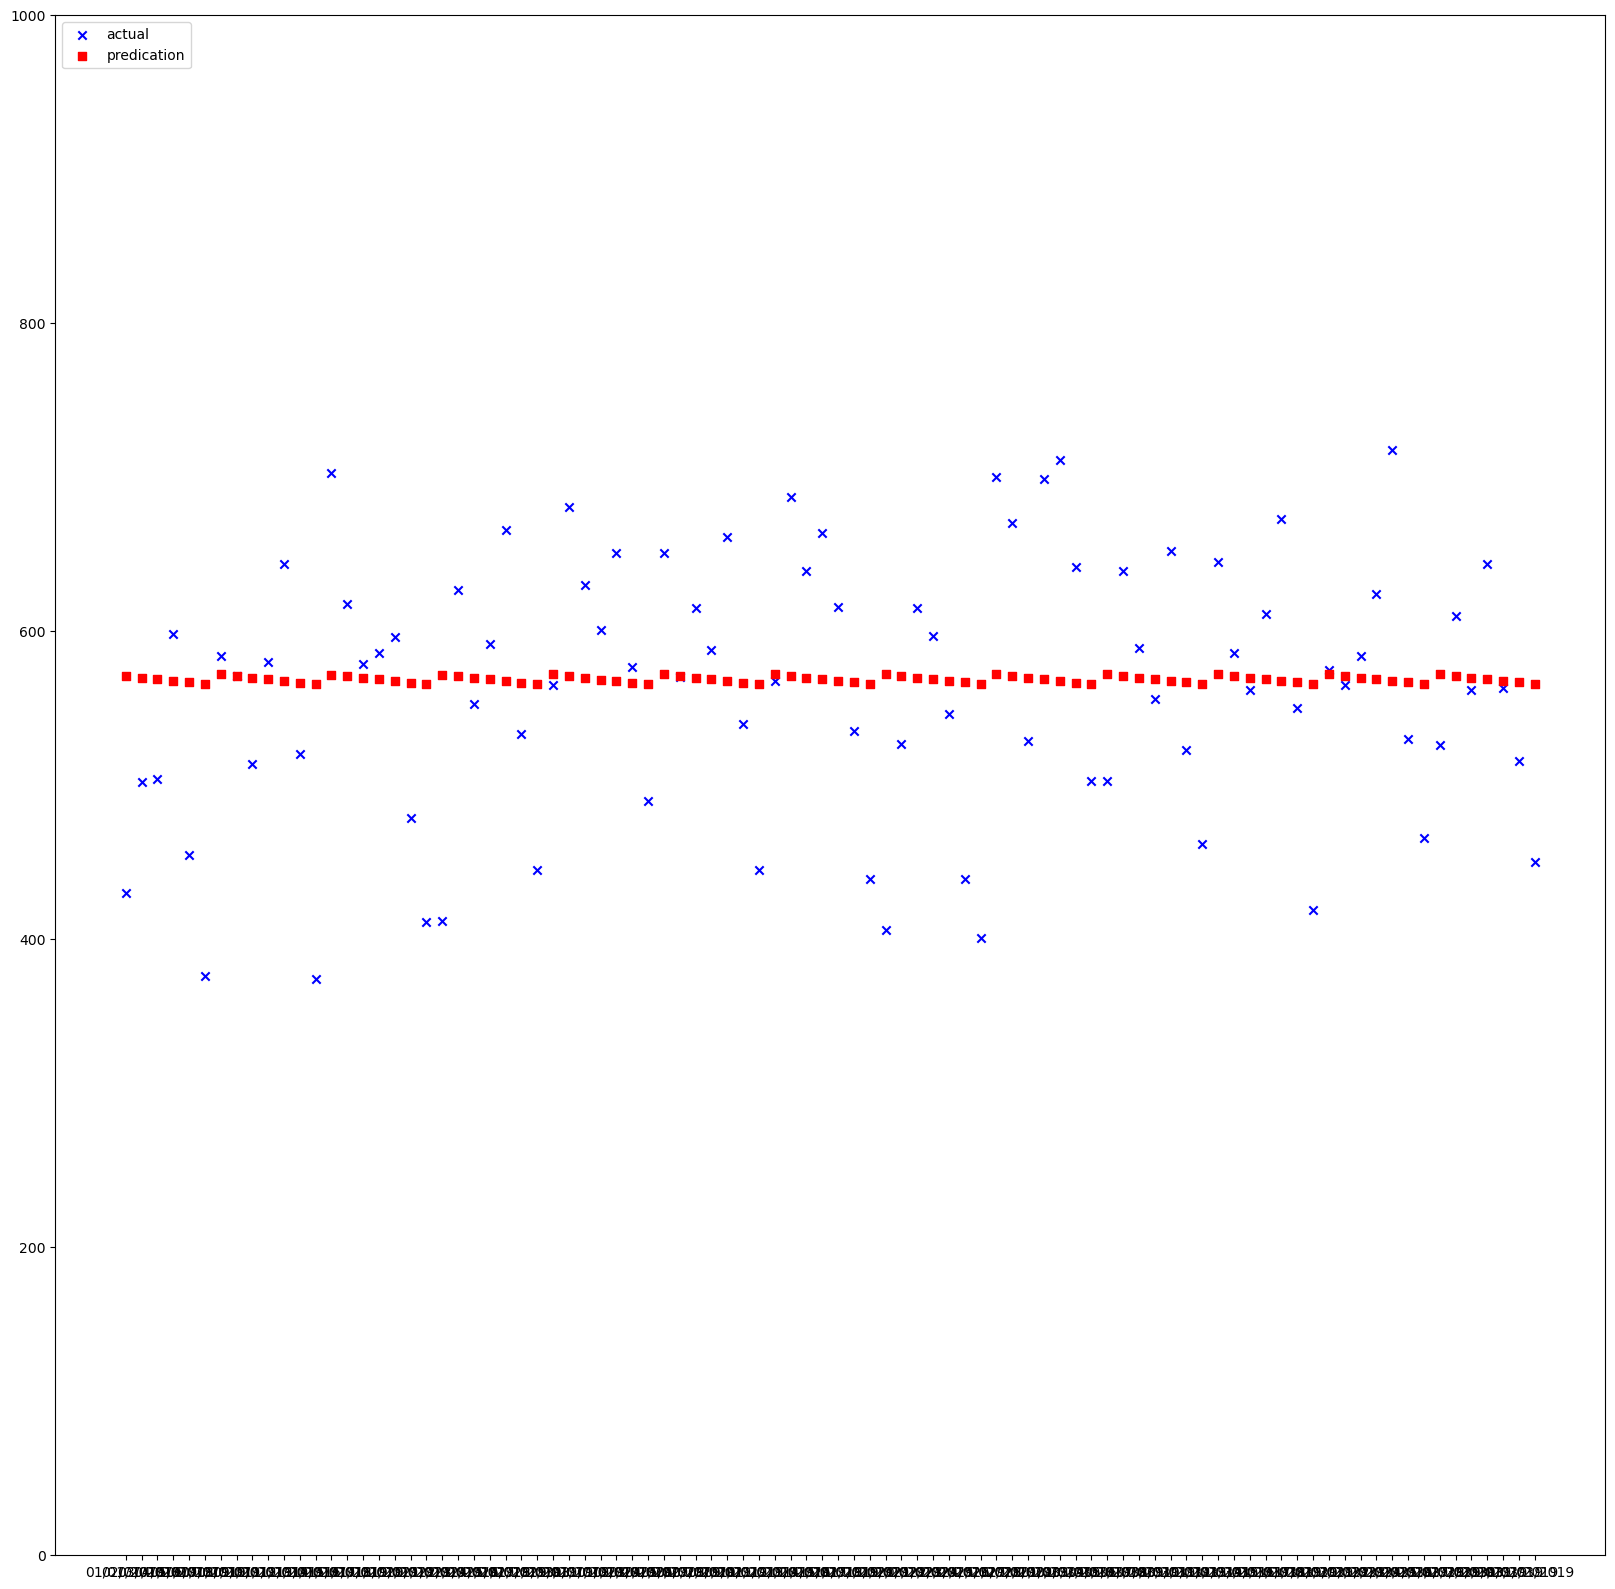

In [655]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(df_test["collision_date"][:90], df_test["NUM_COLLISIONS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_test["collision_date"][:90], linear_multi_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 1000)
plt.legend(loc='upper left')
plt.show()


In this plot, we are visualizing the actual number of collisions (represented by blue crosses) and the predicted number of collisions using the multiple linear regression model (represented by red squares) for the given dates in the 2019 test data. The y-axis is limited to a range of 0 to 1000 collisions, and a legend is displayed in the upper left corner.

The scatter plot shows that the data points have more variability, and the predictions are slightly more complex compared to the previous model. We can observe that, for the test dataset, the actual values tend to be slightly higher than the predicted values, indicating a tendency for the model to slightly underestimate the number of collisions. However, there are no significant outliers present, so there is no need for any manual manipulation of the data. It is important to avoid introducing bias or relying on intuition when making data-driven decisions, as this may worsen the results obtained from the analysis.

# DNN MODEL


In [668]:
print(df_test.columns)

Index(['day', 'year', 'mo', 'da', 'collision_date', 'temp', 'dewp', 'slp',
       'visib', 'wdsp', 'mxpsd', 'gust', 'max', 'min', 'prcp', 'sndp', 'fog',
       'NUM_COLLISIONS'],
      dtype='object')


In [676]:
import pandas as pd

# Assuming 'collision_date' is in "dd/mm/yyyy" format
df_test['collision_date'] = pd.to_datetime(df_test['collision_date'], format='%d/%m/%Y')

# Derive 'day_of_week' and 'month' from 'collision_date'
df_test['day_of_week'] = df_test['collision_date'].dt.day_name()
df_test['month'] = df_test['collision_date'].dt.month_name()

# Create one-hot encoded columns for days of the week
days_dummies = pd.get_dummies(df_test['day_of_week'], prefix='', prefix_sep='')

# Create one-hot encoded columns for months
months_dummies = pd.get_dummies(df_test['month'], prefix='', prefix_sep='')

# Concatenate the new one-hot encoded columns to the original DataFrame
df_test = pd.concat([df_test, days_dummies, months_dummies], axis=1)

# Verify the new columns are added
print(df_test.head())


   day  year  mo         da collision_date  temp  dewp     slp  visib   wdsp  \
0    2  2019   1   Saturday     2019-01-01  50.5  43.2  1009.8    7.0  999.9   
1    3  2019   1     Sunday     2019-01-02  38.0  23.2  1024.2   10.0  999.9   
2    4  2019   1     Monday     2019-01-03  41.1  29.4  1015.8    9.9  999.9   
3    5  2019   1    Tuesday     2019-01-04  39.7  26.4  1014.8    9.9  999.9   
4    6  2019   1  Wednesday     2019-01-05  44.2  41.0  1003.3    5.3  999.9   

   ...  December  February  January   July   June  March    May  November  \
0  ...     False     False     True  False  False  False  False     False   
1  ...     False     False     True  False  False  False  False     False   
2  ...     False     False     True  False  False  False  False     False   
3  ...     False     False     True  False  False  False  False     False   
4  ...     False     False     True  False  False  False  False     False   

  October September  
0   False     False  
1   False   

In [680]:
print(dnn_model.input_shape)

(None, 2)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


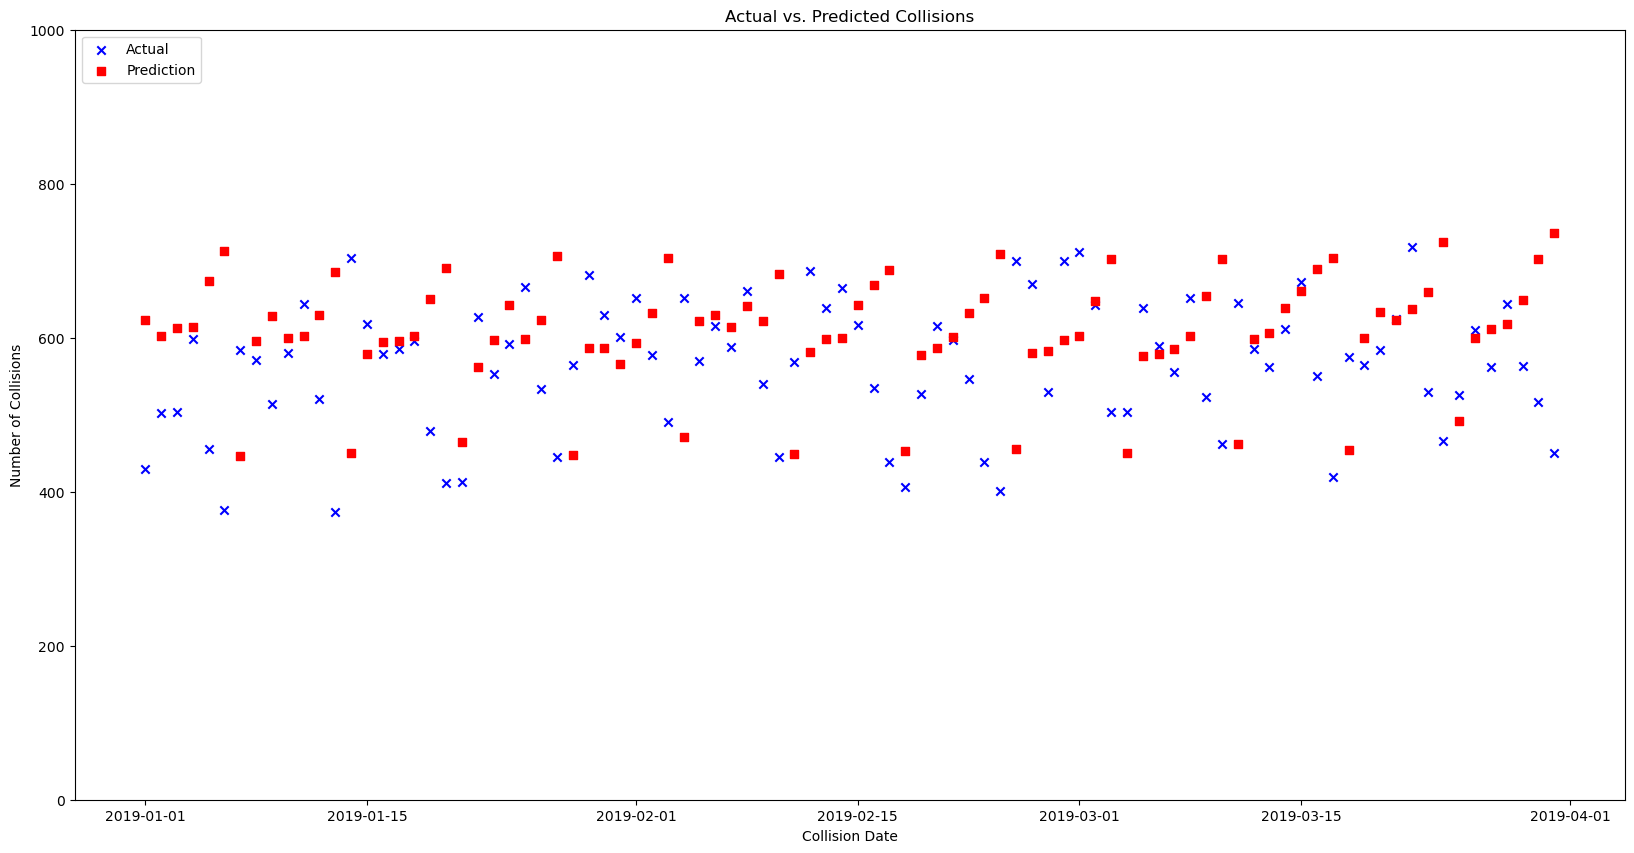

In [684]:
# Prepare the input data with the two features that the model expects
input_data_dnn = df_test[["day", "temp"]][:90]  # Adjust these column names to match the actual features used in training

# Predict using the trained DNN model
dnn_predictions = dnn_model.predict(input_data_dnn) * scale_factor

# Plotting actual vs predicted data
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(df_test["collision_date"][:90], df_test["NUM_COLLISIONS"][:90], c='b', marker='x', label='Actual')
plt.scatter(df_test["collision_date"][:90], dnn_predictions[:90], c='r', marker='s', label='Prediction')
plt.ylim(0, 1000)
plt.xlabel("Collision Date")
plt.ylabel("Number of Collisions")
plt.title("Actual vs. Predicted Collisions")
plt.legend(loc='upper left')
plt.show()


# Conclustion Testing the data

1. Linear Regression Model (Plot 1)

    Observation: The predictions (red squares) seem to follow a relatively flat line compared to the actual data points (blue crosses). The model predicts a similar number of collisions across the dates, which doesn’t align well with the variations observed in the actual data.
    Interpretation: This indicates that the linear regression model might not be capturing the complexity of the relationship between the input features and the number of collisions. It's likely that the model is oversimplifying the prediction, as linear regression is generally not suitable for capturing non-linear relationships or trends that involve multiple varying factors.

2. Multiple Linear Regression Model (Plot 2)

    Observation: The predictions (red squares) still appear relatively flat, similar to the linear regression model, though there might be slightly more variation compared to the first model. However, the predictions do not seem to capture the peaks and troughs of the actual data very well.
    Interpretation: While adding more features in a multiple linear regression model provides more information to the model, it still assumes a linear relationship between the inputs and the output. This might not be enough to accurately predict the number of collisions, especially if the relationship is more complex. The slight improvement over the simple linear model suggests that the additional features do provide some value, but not enough to capture the full complexity of the data.

3. Deep Neural Network (DNN) Model (Plot 3)

    Observation: The DNN model's predictions (red squares) show more variability and seem to follow the trends of the actual data (blue crosses) better than the linear models. However, there are still noticeable discrepancies where the predictions either overshoot or undershoot the actual values.
    Interpretation: The DNN model is capturing more of the complexity in the data compared to the linear models. This is expected since neural networks are capable of modeling non-linear relationships and interactions between features. Despite this, there is still room for improvement, as the model does not perfectly predict the number of collisions. Fine-tuning the model or providing more data could potentially improve its performance further.

Overall Analysis:

    Linear Regression: Oversimplified and fails to capture the variability in the data.
    Multiple Linear Regression: Slightly better than the simple linear model but still insufficient for capturing the full complexity of the data.
    DNN Model: Shows a better fit and captures more variability, but still has errors and could benefit from further optimization.

Conclusion:

The deep neural network model outperforms the linear and multiple linear regression models by better capturing the underlying patterns in the data. However, the DNN model still exhibits some inaccuracies, suggesting that there is more complexity in the data that could be uncovered with further model refinement or additional data. The linear models are too simplistic to provide accurate predictions for this dataset, which likely involves non-linear relationships between the variables

# Final Conclusion (Summary)

This project explored the relationship between weather conditions and traffic accidents in Manhattan, New York, with the goal of predicting collision risks using machine learning models. By combining traffic collision data with weather information, the study applied various data cleaning and feature engineering techniques to enhance the accuracy of the models.

The analysis demonstrated that while simple linear models provided a basic understanding, more sophisticated approaches like Deep Neural Networks (DNN) were necessary to capture the complexity of the data. The DNN model outperformed linear models in predicting collision risks, showing the value of incorporating additional features and using more advanced algorithms.

The project also highlighted the importance of balancing data cleaning with preserving valuable information. Overly cleaned datasets may lose critical insights, underscoring the need for thoughtful feature engineering. The final models were evaluated using independent test data, confirming their predictive power and providing insights that could inform dynamic insurance pricing and urban planning strategies.

In conclusion, the project successfully identified key factors influencing traffic accidents and demonstrated the effectiveness of machine learning in predicting collision risks, paving the way for more informed decision-making in risk management.